Notebook implementation of the following research article:

*The Spectrum of Asynchronous Dynamics in Spiking Networks: A Theory for the Diversity of Non-Rhythmic Waking states in Neocortex*

by Y. Zerlaut*, S. Zucca*, T. Fellin# & S. Panzeri# 



## Summary 
During wakefulness, recent studies have evidenced a set of non-rhythmic network states in neocortex, for which a theoretical description is still lacking. We demonstrate here that, under the constraint of moderate recurrent interactions, spiking networks exhibit a spectrum of asynchronous dynamics ranging from excitatory-dominated sparse activity regimes up to the classically reported states of balanced synaptic activity at high firing levels. In the layer II/III somatosensory cortex of awake mice, we recorded the spiking activity and the membrane potential fluctuations of pyramidal cells. We show that the comodulations of those properties over various non-rhythmic epochs are predicted by the theoretical model, thus suggesting that neural dynamics transiently settle at various levels over the described spectrum. Further theoretical analysis suggests that, by moving along this spectrum, neural networks have the ability to either precisely encode complex patterns of presynaptic activity or to exhibit a high population responsiveness to their afferent input.

In [ ]:
"""
Necessary modules
"""
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from graphs.my_graph import * # my custom module for ~nice plots
import sys, os, scipy, brian2

# all figures will be saved to svg on the desktop for inclusions in multipanels
desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')+os.path.sep
# some colors used all along the study
Blue, Orange, Green, Red, Purple = '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'
Inter = get_linear_colormap(Blue, Orange)(.5) # for the intermediate regime

In [2]:
# -------------------------------------------
#     tested under the following setting
# -------------------------------------------
print('Numpy version: ', np.__version__)
print('SciPy version: ', scipy.__version__)
print('Matplotlib version: ', plt.__version__)
print('Brian2 version: ', brian2.__version__)



Numpy version:  1.12.1
SciPy version:  0.18.1
Matplotlib version:  1.12.1
Brian2 version:  2.0.1


We first write a set of parameters that will be used all along the study, passing options to the individual scripts will allow to override those parameters

In [1]:

S = """
Model = {
    ## ---------------------------------------------------------------------------------
    ### Initialisation by default parameters
    ## UNIT SYSTEM is : ms, mV, pF, nS, pA, Hz (arbitrary and unconsistent, so see code)
    ## ---------------------------------------------------------------------------------
    # numbers of neurons in population
    'N_RecExc':4000, 'N_RecInh':1000, 'N_AffExc':100, 'N_DsInh':500,
    # synaptic weights
    'Q_RecExc_RecExc':2., 'Q_RecExc_RecInh':2., 
    'Q_RecInh_RecExc':10., 'Q_RecInh_RecInh':10., 
    'Q_AffExc_RecExc':4., 'Q_AffExc_RecInh':4., 
    'Q_AffExc_DsInh':4.,
    'Q_DsInh_RecInh':10., 
    # synaptic time constants
    'Tse':5., 'Tsi':5.,
    # synaptic reversal potentials
    'Ee':0., 'Ei': -80.,
    # connectivity parameters
    'p_RecExc_RecExc':0.05, 'p_RecExc_RecInh':0.05, 
    'p_RecInh_RecExc':0.05, 'p_RecInh_RecInh':0.05, 
    'p_AffExc_RecExc':0.1, 'p_AffExc_RecInh':0.1, 
    'p_AffExc_DsInh':0.,
    'p_DsInh_RecInh':0.05, 
    # afferent stimulation
    'F_AffExc':10., 'F_DsInh':0.,
    # recurrent activity (for single cell simulation only)
    'F_RecExc':1., 'F_RecInh':1.,
    # simulation parameters
    'dt':0.1, 'tstop': 100., 'SEED':3, # low by default, see later
    ## ---------------------------------------------------------------------------------
    # === cellular properties (based on AdExp), population by population ===
    # --> Excitatory population (RecExc, recurrent excitation)
    'RecExc_Gl':10., 'RecExc_Cm':200.,'RecExc_Trefrac':5.,
    'RecExc_El':-70., 'RecExc_Vthre':-50., 'RecExc_Vreset':-70., 'RecExc_delta_v':0.,
    'RecExc_a':0., 'RecExc_b': 0., 'RecExc_tauw':1e9,
    # --> Inhibitory population (RecInh, recurrent inhibition)
    'RecInh_Gl':10., 'RecInh_Cm':200.,'RecInh_Trefrac':5.,
    'RecInh_El':-70., 'RecInh_Vthre':-53., 'RecInh_Vreset':-70., 'RecInh_delta_v':0.,
    'RecInh_a':0., 'RecInh_b': 0., 'RecInh_tauw':1e9,
    # --> Disinhibitory population (DsInh, disinhibition)
    'DsInh_Gl':10., 'DsInh_Cm':200.,'DsInh_Trefrac':5.,
    'DsInh_El':-70., 'DsInh_Vthre':-50., 'DsInh_Vreset':-70., 'DsInh_delta_v':0.,
    'DsInh_a':0., 'DsInh_b': 0., 'DsInh_tauw':1e9
}

# now let's say that we will modify or add a parameter in 'Model', we will execute scripts with the new statement:
def pass_arguments_of_new_model(Model):
    S = ''
    for key, val in Model.items():
        S += ' --'+key+' '+str(val)
    return S

import argparse
parser=argparse.ArgumentParser(description='Model parameters',formatter_class=argparse.RawTextHelpFormatter)
"""    


In [2]:
exec(S)

for key, val in Model.items():
    S += 'parser.add_argument("--'+key+'", type='+val.__class__.__name__+', default='+str(val)+') \n'

txt_file = open('model.py', 'w')
txt_file.write(S)
txt_file.close()

### Cellular electrophysiology

very reduced spiking model -> leaky integrate and fire 

In [1]:
from neural_network_dynamics.cells.cell_construct import current_pulse_sim, built_up_neuron_params

#### Excitatory cells

In [ ]:
from model import Model
exc_neuron_params = built_up_neuron_params(Model, 'RecExc')
fig = current_pulse_sim({'amp':210, 'delay':200, 'duration':500, 'color':Green},
                        params=exc_neuron_params);
set_plot(plt.gca(), xlabel='time (ms)', ylabel='$V_m$ (mV)')
#fig.savefig(desktop+'temp.svg')

#### Inhibitory cells

In [ ]:
inh_neuron_params = built_up_neuron_params(Model, 'RecInh')
fig = current_pulse_sim({'amp':210, 'delay':200, 'duration':500, 'color':Red},
                        params=inh_neuron_params);
set_plot(plt.gca(), xlabel='time (ms)', ylabel='$V_m$ (mV)')
#fig.savefig(desktop+'temp.svg')

In [ ]:
#########################################################
####### PSP associated to each synaptic connection ######
#########################################################
from model import Model

def psp(Model, nrn_pre, nrn_post, Ts, Erev, dt=0.1, t0=10, tstop=100):
    Cm, Gl, El = Model[nrn_post+'_Cm'], Model[nrn_post+'_Gl'], Model[nrn_post+'_El']
    t = np.arange(int(tstop/dt))*dt
    Q = Model['Q_'+nrn_pre+'_'+nrn_post]
    g = np.array([Q*np.exp(-tt/Ts) if tt>0 else 0 for tt in t])
    v = [El]
    for i in range(1, len(t)):
        v.append(v[i-1]+dt/Cm*(g[i]*(Erev-v[i-1])+Gl*(El-v[i-1])))
    print(nrn_pre,'->',nrn_post, 'with max depol', np.round(np.abs(np.array(v)-El).max(),2), 'mV')
    return t, np.array(v)

plt.figure(figsize=(2,2))
for i, presyn, Erev in zip(range(3), ['AffExc', 'RecExc', 'RecInh'], [0, 0, -80]):
    plt.plot(*psp(Model, presyn, 'RecExc', 5, Erev), 'k-', lw=4)
plt.plot([60,60], [-68,-66], lw=8, color='grey')
plt.annotate("2mV", (70, -67), fontsize=20)
plt.plot([60,80], [-68,-68], lw=8, color='grey')
plt.annotate("20ms", (70, -69.5), fontsize=20)
set_plot(plt.gca(), [], xticks=[], yticks=[])
#plt.savefig(desktop+'temp.svg')

# A spectrum of asynchronous dynamics in recurrent networks

### Varying afferent excitation in a recurrent network 

#### Perform numerical simulations

In [15]:
import os
from model import pass_arguments_of_new_model, Model

def my_logspace(x1, x2, n):
    return np.logspace(np.log(x1)/np.log(10), np.log(x2)/np.log(10), n)

############################
##### Numerical simulation
Model2 = Model.copy()
Model2['dt'], Model2['tstop'] = 0.1, 2000.
tf_file = 'sparse_vs_balanced/varying_AffExc.py'
S = ''
S += 'python '+tf_file+pass_arguments_of_new_model(Model2)
S += ' --F_AffExc_array'
for fa in my_logspace(3., 25, 30): S += ' '+str(fa)
S += ' --SEEDS'
for s in np.arange(10): S += ' '+str(s)
S += ' -df sparse_vs_balanced/data'+os.path.sep
S += ' -f sparse_vs_balanced/data/varying_AffExc.zip \n'
bash_file = open('sparse_vs_balanced/bash_scan/dep_AffExc_scan.sh', 'w')
bash_file.write(S);bash_file.close()

############################
##### Analysis
S = 'python '+tf_file+' -a -f sparse_vs_balanced/data/varying_AffExc.zip \n'
bash_file = open('sparse_vs_balanced/bash_scan/analysis_dep_AffExc_scan.sh', 'w')
bash_file.write(S);bash_file.close()

###############################
##### fetching data from server
print('sget sparse_vs_balanced/data/varying_AffExc.zip')
print('sget sparse_vs_balanced/data/varying_AffExc_analyzed.npy')

sget sparse_vs_balanced/data/varying_AffExc.zip
sget sparse_vs_balanced/data/varying_AffExc_analyzed.npy


#### Loading data

In [19]:
### to look up at specific configurations, we load all the data
from sparse_vs_balanced.varying_AffExc import get_scan
Model, F_aff, seeds, DATA = get_scan({},
                                     filename='sparse_vs_balanced/data/varying_AffExc.zip')

#### Data analysis

In [3]:
"""
Plotting: varying Afferent Excitation
"""
%matplotlib inline
from sparse_vs_balanced.plot_state_signature import plot_act_vs_aff_level
fig1, fig2 = plot_act_vs_aff_level('sparse_vs_balanced/data/varying_AffExc_analyzed.npy')
# fig1.savefig(desktop+'temp.svg')
# fig2.savefig(desktop+'temp2.svg')

FileNotFoundError: [Errno 2] No such file or directory: 'sparse_vs_balanced/data/varying_AffExc_analyzed.npy'

## Analysis of the synchrony of network activity

In [5]:
"""
Computing synchrony
"""
FA, SYNCH, _, _, EXC_ACT, INH_ACT, _, _, _ = np.load('sparse_vs_balanced/data/varying_AffExc_analyzed.npy')
Synch, sSynch, Fe, Fi = [], [], [], []
for fa in np.unique(np.unique(FA)):
    i0 = np.argwhere(np.array(FA)==fa)
    Synch.append(np.abs(SYNCH[i0]).mean())
    Fe.append(EXC_ACT[i0].mean())
    Fi.append(INH_ACT[i0].mean())
    sSynch.append(np.abs(SYNCH[i0]).std())
XTICKS=[2,5,10,20]
fig3, ax3 = plt.subplots(1, figsize=(3,2))
ax3.errorbar(np.unique(np.unique(FA)), Synch, sSynch, lw=3, color='k')
ax3.set_xscale('log');ax3.set_yscale('log')
set_plot(ax3,
         ylabel='Synch. index', xlabel='$\\nu_a$ (Hz)',
         xticks=XTICKS, yticks=[1e-4, 1e-3, 1e-2],
         xticks_labels=[str(x) for x in XTICKS])
np.save('sparse_vs_balanced/data/varying_AffExc_analyzed2.npy', [np.unique(np.unique(FA)), Synch, sSynch, Fe, Fi])

FileNotFoundError: [Errno 2] No such file or directory: 'sparse_vs_balanced/data/varying_AffExc_analyzed.npy'

### First, let's compare the magnitude of the synchrony index with other regimes

#### Numerical simulations of synchronized activity

In [63]:
"""
Example 1 : Synchronous Regular activity (saturated regime  -- epilepsy like)

---------> achieved by potentiating recurrent excitation !
"""
from model import Model
from sparse_vs_balanced.running_2pop_model import run_2pop_ntwk_model
SR_Model = Model.copy()
SR_Model['Q_RecExc_RecExc'], SR_Model['Q_RecInh_RecExc'] = 8., 8. # multiplying excitatory weights by a factor 4
SR_Model['F_AffExc'] = 7. # no need of high input
run_2pop_ntwk_model(SR_Model, filename='sparse_vs_balanced/data/SR.h5', with_Vm=4, tstop=1000.);

In [64]:
"""
Example 2 : Synchronous Irregular activity (  -- gamma-like)

---------> achieved by potentiating recurrent synapses and a high input !
       we adapt our parameters to reach a configuration 
       somehow similar to Figure 2A in Kumar et al. 2008, Neural Computation
"""
from model import Model
SI_Model = Model.copy()
SI_Model['RecInh_Vthre'] = -50 # symmetric inhibition
SI_Model['Q_RecInh_RecExc'], SI_Model['Q_RecInh_RecInh'] = 30., 30. # raising inh weights
SI_Model['Q_RecExc_RecExc'], SI_Model['Q_RecExc_RecInh'] = 3., 3.  # raising exc weights
SI_Model['Q_AffExc_RecExc'], SI_Model['Q_AffExc_RecInh'] = 2., 2.  # reducing aff weights
SI_Model['p_RecExc_RecExc'], SI_Model['p_RecExc_RecInh'] = 0.2, 0.2 # raising connectivity
SI_Model['p_RecInh_RecExc'], SI_Model['p_RecInh_RecInh'] = 0.2, 0.2 # raising connectivity
SI_Model['F_AffExc'] = 200. # high input
run_2pop_ntwk_model(SI_Model, filename='sparse_vs_balanced/data/SI.h5', with_Vm=4, tstop=1000.);

#### Analysis of synchronized activity

In [70]:
# analysis of synchronous regular (SR) state
from sparse_vs_balanced.plot_state_signature import raster_plot
from data_analysis.IO.hdf5 import load_dict_from_hdf5
SR_data = load_dict_from_hdf5('sparse_vs_balanced/data/SR.h5')
# fig, AX = plt.subplots(1, 3, figsize=(8,2.5));plt.subplots_adjust(wspace=.2)
fig = raster_plot(SR_data, tzoom=[800, 900], Nmax=800, Tbar=10, Nbar=100)
# now get the synchrony index
from neural_network_dynamics.analysis.macro_quantities import get_synchrony_of_spiking
SR_synch_index = get_synchrony_of_spiking(SR_data, pop='RecExc')
print('Synchrony index of Synchronous Regular activity:', SR_synch_index)
fig.savefig(desktop+'temp.png', dpi=500)

Synchrony index of Synchronous Regular activity: 0.96588973448


In [10]:
# analysis of synchronous irregular (SI) state
SI_data = load_dict_from_hdf5('sparse_vs_balanced/data/SI.h5')
fig = raster_plot(SI_data, tzoom=[900, 1000], Nmax=800, Tbar=10, Nbar=100)
# now get the synchrony index
SI_synch_index = get_synchrony_of_spiking(SI_data, pop='RecExc')
print('Synchrony index of Synchronous Irregular activity:', SI_synch_index)
fig.savefig(desktop+'temp.png', dpi=500)

Synchrony index of Synchronous Irregular activity: 0.0247454664965


#### So we put this synchrony in perspective:

In [93]:
fig, ax = plt.subplots(1, figsize=(3,2))
ax.errorbar(Fa, Synch, sSynch, lw=3, color='k', label='network sim.')
ax.set_xscale('log');ax.set_yscale('log')
SR_synch_index=0.97;ax.plot(Fa, SR_synch_index+0.*Fa, 'k--', label='SR act.')
SI_synch_index=0.025;ax.plot(Fa, SI_synch_index+0.*Fa, 'k:', label='SI act.')
ax.legend()
set_plot(ax,
         ylabel='Synch. index', xlabel='$\\nu_a$ (Hz)',
         xticks=XTICKS, xticks_labels=[str(x) for x in XTICKS],
         yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1], xlim=[Fa.min(), Fa.max()])
fig.savefig(desktop+'temp.svg')

### Let's compare the network synchrony with those of independent Poisson processes (finite number) 

In [22]:
def generate_discrete_Poisson_process(freq, dt, N, tstop):
    indices, times = [], []
    # trivial way to generate homogeneous poisson events
    for it in range(int(tstop/dt)):
        rdm_num = np.random.random(N)
        for ii in np.arange(N)[rdm_num<dt*freq*1e-3]:
            indices.append(ii) # all the indices
            times.append(it*dt) # all the same time !
    return np.array(indices), np.array(times)

In [63]:
from neural_network_dynamics.analysis.macro_quantities import get_synchrony_of_spiking
# loading the parameters of the simulation !
data = dict(np.load('sparse_vs_balanced/data/time_varying_input_Model.npz').items())
data2 = data.copy()
data2['tstop'] = [data['tstop']]
data2['0'] = {'N':data['N_RecExc'], 'name':'RecExc'}
data2['1'] = {'N':data['N_RecInh'], 'name':'RecInh'}
# laoding the output of the network numerical simulations
Fa, Synch, sSynch, Fe, Fi = np.load('sparse_vs_balanced/data/varying_AffExc_analyzed2.npy')
indep_Synch, indep_sSynch = 0*Synch, 0*sSynch
for i in range(len(Fa)):
    # loop over afferent levels
    SYNCH = []
    for n in data['SEEDS']:
        data2['iRASTER_RecExc'], data2['tRASTER_RecExc'] =\
            generate_discrete_Poisson_process(Fe[i], data['dt'], data['N_RecExc'], data['tstop'])
        data2['iRASTER_RecInh'], data2['tRASTER_RecInh'] =\
            generate_discrete_Poisson_process(Fi[i], data['dt'], data['N_RecInh'], data['tstop'])
        s = .2*get_synchrony_of_spiking(data2, pop='RecInh')+.8*get_synchrony_of_spiking(data2, pop='RecExc')
        SYNCH.append(s)
    indep_Synch[i], indep_sSynch[i] = np.array(np.abs(SYNCH)).mean(), np.array(np.abs(SYNCH)).std()        

In [95]:
fig, ax = plt.subplots(1, figsize=(3,2))
ax.errorbar(Fa, Synch, sSynch, lw=3, color='k', label='network sim.')
ax.errorbar(Fa, indep_Synch, indep_sSynch, lw=3, color=Brown, label='Poisson sim.')
ax.set_xscale('log')
ax.legend()
set_plot(ax, xlim=[Fa.min(), Fa.max()],
         ylabel='Synch. index', xlabel='$\\nu_a$ (Hz)',
         yticks=[0, 0.003, 0.006],
         xticks=XTICKS, xticks_labels=[str(x) for x in XTICKS])
fig.savefig(desktop+'temp.svg')

In [ ]:
from sparse_vs_balanced.plot_state_signature import raster_plot
from data_analysis.IO.hdf5 import load_dict_from_hdf5

In [223]:
# let's have a look at the level that shows a high synchrony index
i0, i1 = 29, 2
fig = raster_plot(DATA[i1+len(Model['SEEDS'])*i0], tzoom=[1100, 1200], Nmax=1000, Tbar=10, Nbar=100)
fig.suptitle('$\\nu_a$='+str(round(F_aff[i0],1))+'Hz');fig.savefig(desktop+'temp.png', dpi=500)
fig.savefig(desktop+'temp.png', dpi=500)

In [141]:
from data_analysis.processing.signanalysis import gaussian_smoothing
Tsmooth = 2.
Fe = gaussian_smoothing(data['POP_ACT_RecExc'], int(Tsmooth/data['dt']))
from data_analysis.freq_analysis.wavelet_transform import my_cwt, time_freq_plot
freqs = np.linspace(1, 100, 100)
coefs = my_cwt(Fe, freqs, 1e-3*data['dt'])
time_freq_plot(1e-3*np.arange(int(data['tstop']/data['dt']))*data['dt'], freqs, Fe, coefs);

In [99]:
np.mean(np.abs(coefs[freqs<20,:]**2)/np.abs(coefs**2).mean())

0.37718426659583226

In [142]:
Tsmooth = 2
freqs = np.linspace(1, 100, 100)
LOW_FREQ_POWER = np.zeros((len(F_aff), len(seeds)))
from itertools import product
for i0, i1 in product(range(len(F_aff)), range(len(seeds))):
    data = DATA[i0*len(seeds)+i1]
    coefs = my_cwt(gaussian_smoothing(data['POP_ACT_RecExc'], int(Tsmooth/data['dt'])), freqs, 1e-3*data['dt'])
    power = np.power(coefs,2)
    LOW_FREQ_POWER[i0, i1] = power[freqs<20,:].mean()/power.mean()


In [18]:
FA, SYNCH, _, BALANCE, EXC_ACT, INH_ACT, _, _, _ = np.load('sparse_vs_balanced/data/dAE_n_pconn_factor_1_analyzed.npy')

fig, AX = plt.subplots(2, figsize=(4,4.5))
AX[0].errorbar(F_aff, SYNCH.reshape(len(F_aff),len(seeds)).mean(axis=1),
               yerr=SYNCH.reshape(len(F_aff),len(seeds)).std(axis=1),
               color='k', lw=2)
AX[1].errorbar(F_aff, LOW_FREQ_POWER.mean(axis=1), yerr=LOW_FREQ_POWER.std(axis=1), color='k', lw=2)
for ax in AX:
    ax.set_xscale('log')
set_plot(AX[0], ['left'])
set_plot(AX[1], xlabel='$\\nu_a$ (Hz)', ylabel='$\| P_{f \in [1,20] Hz} \|$')

NameError: name 'F_aff' is not defined

NameError: name 'F_aff' is not defined

In [165]:
from matplotlib.cm import viridis

fig, ax = plt.subplots(1, figsize=(4.3,2.3));
plt.subplots_adjust(right=.7)
ax.set_xscale('log')
# ax.set_yscale('log');

N_FACTOR = [0.5, 1, 2, 4, 8] # chosen values to investigate
for i, p in enumerate(N_FACTOR):
    DATA = np.load('sparse_vs_balanced/data/dAE_n_pconn_factor_'+str(p)+'_analyzed.npy')
    Fa = DATA[0]
    # getting seeds and unique Fa values
    F_aff = np.unique(Fa)
    seeds = np.arange(int(len(Fa)/len(F_aff)))
    Synch = DATA[1].reshape((len(F_aff), len(seeds)))
    Synch, sSynch = np.abs(Synch).mean(axis=1), np.abs(Synch).std(axis=1)
    col = viridis(i/(len(N_FACTOR)-1))
    ax.errorbar(F_aff, Synch, yerr=sSynch, fmt='o-', ms=3, color=col, lw=2)
    # let's build up the color legend for this parameter
ax2 = fig.add_axes([0.91, 0.01, 0.04, 0.8])
build_bar_legend(np.arange(len(N_FACTOR)+1), ax2, viridis,
                 label='size factor \n'+r'$(N_{tot} \propto \frac{1}{p})$',\
                 ticks_labels= [str(p) for p in N_FACTOR]);
set_plot(ax, xlim=[Fa.min(), Fa.max()],
         ylabel='Synch. index', xlabel='$\\nu_a$ (Hz)',
         yticks=[0, 0.005, 0.01],
         xticks=XTICKS, xticks_labels=[str(x) for x in XTICKS])

fig.savefig(desktop+'temp.svg')

## Looking at two regimes withing the spectrum

In [3]:
"""
Example 1 : Sparse Activity (running simulation and saving)
"""
# function to run the two population model
from sparse_vs_balanced.running_2pop_model import run_2pop_ntwk_model
from model import Model
SA_Model = Model.copy()
SA_Model['F_AffExc'], SA_Model['F_DsInh'] = 4.5, 0.
run_2pop_ntwk_model(SA_Model, filename='sparse_vs_balanced/data/sas.h5', with_Vm=10, tstop=10000.);

In [ ]:
"""
Example 2 : Balanced Activity (running simulation and saving)
"""
# function to run the two population model
from sparse_vs_balanced.running_2pop_model import run_2pop_ntwk_model
from model import Model
BS_Model = Model.copy()
BS_Model['F_AffExc'], BS_Model['F_DsInh'] = 20., 0.
run_2pop_ntwk_model(BS_Model, filename='sparse_vs_balanced/data/bs.h5', with_Vm=10, tstop=10000.);

## Comparing the two regimes

In [4]:
"""
Show membrane potential time traces
"""
%matplotlib inline
import os
from data_analysis.IO.hdf5 import load_dict_from_hdf5
from sparse_vs_balanced.plot_state_signature import few_Vm_fig
sas_data = load_dict_from_hdf5('sparse_vs_balanced/data/sas.h5')
bs_data = load_dict_from_hdf5('sparse_vs_balanced/data/bs.h5')
fig = few_Vm_fig([sas_data,bs_data], pop_key='RecExc',
                 tzoom=[1000,1700],
                 # VMS1=[0, 2, 3, 14], VMS2=[0, 7, 4, 15],
                 VMS1=np.arange(4),
                 tspace=100);
fig.savefig(desktop+'temp.svg')

In [4]:
"""
Show membrane potential distributions
"""
%matplotlib inline
import os
from data_analysis.IO.hdf5 import load_dict_from_hdf5
sas_data = load_dict_from_hdf5('sparse_vs_balanced/data/sas.h5')
bs_data = load_dict_from_hdf5('sparse_vs_balanced/data/bs.h5')
from sparse_vs_balanced.plot_state_signature import Vm_histograms
fig = Vm_histograms([bs_data, sas_data], tspkdiscard=20.);
fig.savefig(desktop+'temp.svg')

In [5]:
"""
Show membrane potential distributions
"""
from sparse_vs_balanced.plot_state_signature import Vm_autocorrel
fig = Vm_autocorrel([sas_data, bs_data]);
fig.savefig(desktop+'temp.svg')

In [6]:
"""
Showing the signature in terms of membrane potential fluctuations:
1) mean 
2) standard deviation
3) skewness
4) autocorrelation time
"""
%matplotlib inline
import os
from data_analysis.IO.hdf5 import load_dict_from_hdf5
sas_data = load_dict_from_hdf5('sparse_vs_balanced/data/sas.h5')
bs_data = load_dict_from_hdf5('sparse_vs_balanced/data/bs.h5')
from sparse_vs_balanced.plot_state_signature import Vm_signature
fig = Vm_signature([sas_data, bs_data]);
fig.savefig(desktop+'temp.svg')

In [40]:
# Model, F_aff, seeds, DATA = get_scan({},filename='sparse_vs_balanced/data/varying_AffExc.zip')
# MUV, SV, TV, SKV = [np.zeros(len(F_aff)) for i in range(4)]
tdiscard = 200
from scipy.stats import skew

fig, AX = plt.subplots(1, 4, figsize=(5,2))
pop_key = 'RecExc'
data = DATA[0]
t = np.arange(int(data['tstop']/data['dt']))*data['dt']
dt = data['dt']
for i, fa in enumerate(F_aff):
    MUV2, SV2, TV2, SKV2 = [], [], [], []
    for j in range(int(len(DATA)/len(F_aff))):
        data = DATA[i*len(seeds)+j]
        MUV, SV, TV, SKV = [], [], [], []
        for k in range(len(data['VMS_'+pop_key])):
            cond = (t>tdiscard) & (data['VMS_'+pop_key][k]!=-70)
            MUV.append(data['VMS_'+pop_key][k][cond].mean()+70)
            SV.append(data['VMS_'+pop_key][k][cond].std())
            SKV.append(skew(data['VMS_'+pop_key][k][cond]))
            # TV.append(get_acf_time(data['VMS_'+pop_key][k][cond], dt))
        MUV2.append(np.mean(MUV))
        SV2.append(np.mean(SV))
        SKV2.append(np.mean(SKV))
        # TV2.append(np.mean(TV))
    for ax, quant in zip(AX, [MUV2, SV2, SKV2]):
        ax.errorbar(fa, np.mean(quant), np.std(quant))
        ax.set_xscale('log')
        # set_plot(ax)


In [7]:
"""
Showing the excitatory and inhibitory conductances in the two regimes
"""
from sparse_vs_balanced.plot_state_signature import conductances
fig = conductances([sas_data, bs_data]);
fig.savefig(desktop+'temp.svg')

In [17]:
tdiscard, NVm= 200, 4                 
pop_key='RecExc'
LABELS=['SAS', 'BS']
for k, data in enumerate([sas_data, bs_data]):
    t = np.arange(int(data['tstop']/data['dt']))*data['dt']
    cond = t>tdiscard
    total_syn_conductances = 0
    for i, key in zip(range(NVm), ['GSYNe', 'GSYNi']):
        mean = np.mean([data[key+'_'+str(pop_key)][j].mean() for j in range(NVm)])
        total_syn_conductances += mean
    print(LABELS[k], 'fraction of total conductances (for Gl=10nS) ', total_syn_conductances/10.)

SAS fraction of total conductances (for Gl=10nS)  0.250684477994
BS fraction of total conductances (for Gl=10nS)  6.69556414016


In [8]:
"""
Show the traces of excitatory and inhibitory synaptic currents
"""
from sparse_vs_balanced.plot_state_signature import Isyn_fig
fig = Isyn_fig([sas_data, bs_data],
               tzoom=[1000,1700],
               VMS1=1, VMS2=0);
fig.savefig(desktop+'temp.svg')

# Dependency on cellular and network parameters

In [3]:
############################################################
##### Constructing simulations for parameter variations ####
############################################################

import os
from model import pass_arguments_of_new_model, Model
# to plot parameter variations, we use a color code:
from graphs.my_graph import build_bar_legend
from matplotlib.cm import viridis

def my_logspace(x1, x2, n):
    return np.logspace(np.log(x1)/np.log(10), np.log(x2)/np.log(10), n)

def run_one_config_of_dep_on_ExcAff(Model_modif,
                                    filename='data.zip',
                                    Faff=my_logspace(3., 25, 30),
                                    seeds=np.arange(1, 5),
                                    dt=0.1, tstop=10000,\
                                    Sim_string ='',
                                    Analysis_string = '',
                                    Fetch_data_string = '',
                                    Fetch_analysis_string = ''):

    for s in [Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string]:
        s += 'echo --------------------------------------------------------------------'
        s += 'echo -------'+filename+'------------------------------------'
    
    Model2 = Model.copy()
    Model2['dt'], Model2['tstop'] = dt, tstop
    for key, val in Model_modif.items():
        Model2[key] = val
    tf_file = 'sparse_vs_balanced/varying_AffExc.py'

    Sim_string += 'python '+tf_file+pass_arguments_of_new_model(Model2)
    Sim_string += ' --F_AffExc_array'
    for fa in Faff: Sim_string += ' '+str(fa)
    Sim_string += ' --SEEDS'
    for s in seeds: Sim_string += ' '+str(s)
    Sim_string += ' -df sparse_vs_balanced/data'+os.path.sep
    Sim_string += ' -f sparse_vs_balanced/data'+os.path.sep+filename+' & \n'
    
    Analysis_string += 'python '+tf_file+' -a -f sparse_vs_balanced/data'+os.path.sep+filename+' & \n'

    Fetch_data_string += 'sget sparse_vs_balanced/data'+os.path.sep+filename+' \n'
    Fetch_analysis_string += 'sget sparse_vs_balanced/data/'+filename.replace('.zip', '_analyzed.npy')+' \n'

    return Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string

def write_bash_scripts(Sim_string, Analysis_string,
                       Fetch_data_string, Fetch_analysis_string, FILENAME):
    bash_file = open(FILENAME, 'w')
    bash_file.write(Sim_string);bash_file.close()
    bash_file = open(FILENAME.replace('bash_scan/', 'bash_scan/analysis_'), 'w')
    bash_file.write(Analysis_string);bash_file.close()
    bash_file = open(FILENAME.replace('bash_scan/', 'bash_scan/fetch_data_'), 'w')
    bash_file.write(Fetch_data_string);bash_file.close()
    bash_file = open(FILENAME.replace('bash_scan/', 'bash_scan/fetch_analysis_'), 'w')
    bash_file.write(Fetch_analysis_string);bash_file.close()


In [3]:
#########################################################################
## plotting how the relationship to afferent activity is affected
####      by a specific parameter
#########################################################################
from graphs.my_graph import set_plot

def plot_effect_of_params(PARAMS, base_filename, label,
                          xticks=[5,10,20], xticks_labels=['5','10','20'],
                          yticks=[0.01, 0.1, 1., 10.], yticks_labels=['<0.01', '0.1', '1', '10'],\
                          SI_synch = 0.03, SR_synch=0.96):
    fig, AX = plt.subplots(1, 4, figsize=(13,2));
    plt.subplots_adjust(wspace=1.1, right=.87)
    
    for ax in AX: ax.set_xscale('log')
    for ax in [AX[0], AX[1], AX[3]]: ax.set_yscale('log');
    
    for i, p in enumerate(PARAMS):
        DATA = np.load(base_filename+str(p)+'_analyzed.npy')
        Fa = DATA[0]
        # getting seeds and unique Fa values
        F_aff = np.unique(Fa)
        seeds = np.arange(int(len(Fa)/len(F_aff)))
        Synch, Ii_over_Ie, NUe, NUi = DATA[1].reshape((len(F_aff), len(seeds))), DATA[3].reshape((len(F_aff), len(seeds))),\
            DATA[4].reshape((len(F_aff), len(seeds))), DATA[5].reshape((len(F_aff), len(seeds)))
        Fe, sFe, Fi, sFi = NUe.mean(axis=1), NUe.std(axis=1), NUi.mean(axis=1), NUi.std(axis=1)
        # to limit data range, hence the <0.01 legend:
        Fe[Fe<0.01], sFe[Fe<0.01], Fi[Fi<0.01], sFi[Fi<0.01] = 0.01, 0., 0.01, 0. 
        sFe[Fe-sFe<1e-2], sFi[Fi-sFi<1e-2] = np.abs(Fe[Fe-sFe<1e-2]-1e-2), np.abs(Fi[Fi-sFi<1e-2]-1e-2)
        Synch, sSynch = np.abs(Synch).mean(axis=1), np.abs(Synch).std(axis=1)
        Ii_over_Ie, sIi_over_Ie = np.abs(Ii_over_Ie).mean(axis=1), np.abs(Ii_over_Ie).std(axis=1)
        Synch[Synch<1e-4] = 1.1e-4
        sSynch[Synch-sSynch<1e-4] = np.abs(Synch[Synch-sSynch<1e-4]-1e-4)
        col = viridis(i/(len(PARAMS)-1))
        for ax, y, sy, fmt in zip(AX, [Fe, Fi, Ii_over_Ie, Synch], [sFe, sFi, sIi_over_Ie, sSynch],
                                  ['o-', 'o-', 'o-', 'o']):
            ax.errorbar(F_aff, y, yerr=sy, fmt=fmt, ms=3, color=col, lw=2)

    for ax in AX: ax.set_xlim([F_aff[0], F_aff[-1]])

    set_plot(AX[0], xlabel='$\\nu_a$ (Hz)', ylabel='$\\nu_e$ (Hz)',
             xticks=xticks, xticks_labels=xticks_labels,
             yticks=yticks, yticks_labels=yticks_labels)
    set_plot(AX[1], xlabel='$\\nu_a$ (Hz)', ylabel='$\\nu_i$ (Hz)',
             xticks=xticks, xticks_labels=xticks_labels,
             yticks=yticks, yticks_labels=yticks_labels)
    set_plot(AX[2], xlabel='$\\nu_a$ (Hz)', ylabel='$ \| I_i$ / $I_e \|$',
             xticks=xticks, xticks_labels=xticks_labels, yticks=[0., 0.5, 1.])
    AX[3].plot(F_aff, SR_synch+0.*F_aff, 'k--', label='SR act.')
    AX[3].plot(F_aff, SI_synch+0.*F_aff, 'k:', label='SI act.')
    AX[3].plot([Fa[0], Fa[0]], [1e-4, 1.], 'w.', ms=0.01)
    set_plot(AX[3], ylabel='synch. index', xlabel='$\\nu_a$ (Hz)',
             xticks=xticks, xticks_labels=xticks_labels,
             yticks=[1e-4, 1e-3, 0.01, 0.1, 1.],
             yticks_labels=['<1e-4', '1e-3', '1e-2', '1e-1', '1'])
    # let's build up the color legend for this parameter
    ax = fig.add_axes([0.91, 0.01, 0.02, 0.8])
    build_bar_legend(np.arange(len(PARAMS)+1), ax, viridis, label=label,\
                     ticks_labels= [str(p) for p in PARAMS]);
    return fig

In [6]:
############################################################################
##### visualizing the dynamics of a specific set of parameters #############
# RASTER PLOT + 4 VMS SAMPLES (3 Exc + 1 Inh) + 1 SYNAPTIC CURRENTS SAMPLE #
############################################################################

from sparse_vs_balanced.varying_AffExc import get_scan
from sparse_vs_balanced.plot_state_signature import raster_plot, four_Vm_traces, one_Isyn_sample

def look_at_specific_realisation(PARAMS, N, base_filename,
                                 Faff=5., label='$Q_a$', unit='',
                                 pop='RecExc',
                                 tzoom=[1000, 2000], Nmax=1000, Tbar=50, Nbar=200):
    from model import Model
    Model, FA, seeds, DATA = get_scan(Model, filename=base_filename+str(PARAMS[N])+'.zip')
    data = DATA[np.argmin(np.abs(FA-Faff))]
    true_faff = FA[np.argmin(np.abs(FA-Faff))]
    fig, AX = plt.subplots(1, 3, figsize=(8,2.5));plt.subplots_adjust(wspace=.2)
    fig.suptitle('$\\nu_a$='+str(round(true_faff,1))+'Hz, '+label+'='+str(PARAMS[N])+unit)
    raster_plot(data, AX[0], tzoom=tzoom, Nmax=Nmax, Tbar=Tbar, Nbar=Nbar)
    four_Vm_traces(data, AX[1], Tbar=Tbar, tzoom=tzoom)
    one_Isyn_sample(data, AX[2], Tbar=Tbar, tzoom=tzoom, pop_key=pop)
       

### Varying the strength of the excitatory afferent synapse

In [6]:
# factor with which we multiply the default weights
QA_VALUES = [2., 3., 4., 5.] # chosen values to investigate

FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for q in QA_VALUES:
    FILENAMES.append('dAE_QaValues_'+str(q)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'Q_AffExc_RecExc':q,
                                         'Q_AffExc_RecInh':q},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
    
    
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_Qa.sh')

In [12]:
print(Fetch_analysis_string)

sget sparse_vs_balanced/data/dAE_QaValues_2.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QaValues_3.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QaValues_4.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QaValues_5.0_analyzed.npy 



In [10]:
fig = plot_effect_of_params(QA_VALUES, 'sparse_vs_balanced/data/dAE_QaValues_', '$Q_a$ (nS)')
fig.savefig(desktop+'temp.svg')

In [79]:
look_at_specific_realisation(QA_VALUES, 3, 
                             'sparse_vs_balanced/data/dAE_QaValues_', 
                             Faff=10., Tbar=100.)

### Varying the strength of recurrent synaptic weights

In [4]:
# factor with which we multiply the default weights
Q_FACTOR = [0.2, 0.5, 1., 2., 5.] # chosen values to investigate

In [5]:
#########################################################
####### PSP associated to each synaptic connection ######
#########################################################

def psp(Model, nrn_pre, nrn_post, Ts, Erev, dt=0.1, t0=10, tstop=100):
    Cm, Gl, El = Model[nrn_post+'_Cm'], Model[nrn_post+'_Gl'], Model[nrn_post+'_El']
    t = np.arange(int(tstop/dt))*dt
    Q = Model['Q_'+nrn_pre+'_'+nrn_post]
    g = np.array([Q*np.exp(-tt/Ts) if tt>0 else 0 for tt in t])
    v = [El]
    for i in range(1, len(t)):
        v.append(v[i-1]+dt/Cm*(g[i]*(Erev-v[i-1])+Gl*(El-v[i-1])))
    return t, np.array(v)

from matplotlib.cm import viridis
from model import Model
Model2 = Model.copy()

plt.figure(figsize=(2,2))
for i, factor in enumerate(Q_FACTOR[::-1]):
    for key in ['Q_RecExc_RecExc', 'Q_RecExc_RecInh', 'Q_RecInh_RecExc', 'Q_RecInh_RecInh']:
        Model2[key] = factor*Model[key]
    for j, presyn, Erev in zip(range(2), ['RecExc', 'RecInh'], [0, -80]):
        plt.plot(*psp(Model2, presyn, 'RecExc', 5, Erev), '-', lw=4, color=viridis(1-i/(len(Q_FACTOR)-1)))
plt.plot([60,60], [-68,-65], lw=4, color='grey')
plt.annotate("3mV", (70, -67), fontsize=20)
plt.plot([60,80], [-68,-68], lw=4, color='grey')
plt.annotate("20ms", (70, -69.5), fontsize=20)
set_plot(plt.gca(), [], xticks=[], yticks=[])
plt.savefig(desktop+'temp.svg')

In [44]:
"""
Example 1 : Strong Recurrent Weights
"""
factor = 5.
# function to run the two population model
from sparse_vs_balanced.running_2pop_model import run_2pop_ntwk_model
from model import Model
StrongRec_Model = Model.copy()
for key in ['Q_RecExc_RecExc', 'Q_RecExc_RecInh', 'Q_RecInh_RecExc', 'Q_RecInh_RecInh']:
    StrongRec_Model[key] = factor*Model[key]

In [45]:
# low level of input
StrongRec_Model['F_AffExc'], StrongRec_Model['F_DsInh'] = 4., 0.
run_2pop_ntwk_model(StrongRec_Model, filename='sparse_vs_balanced/data/strongrec_level1.h5', with_Vm=10, tstop=10000.);

In [46]:
# high level of input
StrongRec_Model['F_AffExc'], StrongRec_Model['F_DsInh'] = 20., 0.
run_2pop_ntwk_model(StrongRec_Model, filename='sparse_vs_balanced/data/strongrec_level2.h5', with_Vm=10, tstop=10000.);

In [53]:
"""
Example 2 : Moderate Recurrent Weights
"""
factor = 1.
# function to run the two population model
from sparse_vs_balanced.running_2pop_model import run_2pop_ntwk_model
from model import Model
ModerateRec_Model = Model.copy()
for key in ['Q_RecExc_RecExc', 'Q_RecExc_RecInh', 'Q_RecInh_RecExc', 'Q_RecInh_RecInh']:
    ModerateRec_Model[key] = factor*Model[key]

In [54]:
# low level of input
ModerateRec_Model['F_AffExc'], ModerateRec_Model['F_DsInh'] = 4., 0.
run_2pop_ntwk_model(ModerateRec_Model, filename='sparse_vs_balanced/data/moderaterec_level1.h5', with_Vm=10, tstop=10000.);

In [55]:
# high level of input
ModerateRec_Model['F_AffExc'], ModerateRec_Model['F_DsInh'] = 20., 0.
run_2pop_ntwk_model(ModerateRec_Model, filename='sparse_vs_balanced/data/moderaterec_level2.h5', with_Vm=10, tstop=10000.);

In [56]:
"""
Example 2 : Weak Recurrent Weights
"""
factor = 0.2
# function to run the two population model
from sparse_vs_balanced.running_2pop_model import run_2pop_ntwk_model
from model import Model
WeakRec_Model = Model.copy()
for key in ['Q_RecExc_RecExc', 'Q_RecExc_RecInh', 'Q_RecInh_RecExc', 'Q_RecInh_RecInh']:
    WeakRec_Model[key] = factor*Model[key]

In [57]:
# low level of input
WeakRec_Model['F_AffExc'], WeakRec_Model['F_DsInh'] = 4., 0.
run_2pop_ntwk_model(WeakRec_Model, filename='sparse_vs_balanced/data/weakrec_level1.h5', with_Vm=10, tstop=10000.);

In [58]:
# high level of input
WeakRec_Model['F_AffExc'], WeakRec_Model['F_DsInh'] = 20., 0.
run_2pop_ntwk_model(WeakRec_Model, filename='sparse_vs_balanced/data/weakrec_level2.h5', with_Vm=10, tstop=10000.);

In [29]:
## plot of file comparison
from data_analysis.IO.hdf5 import load_dict_from_hdf5
strongrec_level1 = load_dict_from_hdf5('sparse_vs_balanced/data/strongrec_level1.h5')
strongrec_level2 = load_dict_from_hdf5('sparse_vs_balanced/data/strongrec_level2.h5')
moderaterec_level1 = load_dict_from_hdf5('sparse_vs_balanced/data/moderaterec_level1.h5')
moderaterec_level2 = load_dict_from_hdf5('sparse_vs_balanced/data/moderaterec_level2.h5')
weakrec_level1 = load_dict_from_hdf5('sparse_vs_balanced/data/weakrec_level1.h5')
weakrec_level2 = load_dict_from_hdf5('sparse_vs_balanced/data/weakrec_level2.h5')

Vshift=-5
t = np.arange(int(weakrec_level2['tstop']/weakrec_level2['dt']))*weakrec_level2['dt']
cond = (t>250) & (t<1250)
fig, AX = plt.subplots(1, 2, figsize=(10,3))
for i, data in enumerate([strongrec_level1, moderaterec_level1, weakrec_level1]):
    AX[0].plot(t[cond], data['VMS_RecExc'][0][cond]+Vshift*i, color=viridis((2-i)/2))
    AX[0].plot(t[cond], -70+Vshift*i+0.*t[cond], ':', color=viridis((2-i)/2))
for i, data in enumerate([strongrec_level2, moderaterec_level2, weakrec_level2]):
    AX[1].plot(t[cond], data['VMS_RecExc'][0][cond]+Vshift*i, color=viridis((2-i)/2))
    AX[1].plot(t[cond], -70+Vshift*i+0.*t[cond], ':', color=viridis((2-i)/2))
AX[0].set_title('$\\nu_a$=4Hz')
AX[1].set_title('$\\nu_a$=20Hz')
set_plot(AX[0], [], xticks=[], yticks=[], ylim=[-81, -48])
set_plot(AX[1], [], xticks=[], yticks=[], ylim=[-81, -48])
AX[1].plot([t[cond][0]+1, t[cond][0]+1], [-70, -60], color='gray', lw=4)
AX[1].plot([t[cond][0]+1, t[cond][0]+101], [-70, -70], color='gray', lw=4)
#fig.savefig(desktop+'temp.svg')

#### Ensemble analysis

In [4]:
FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for q in Q_FACTOR:
    FILENAMES.append('dAE_Qfactor_'+str(q)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'Q_RecExc_RecExc':Model['Q_RecExc_RecExc']*q,
                                          'Q_RecExc_RecInh':Model['Q_RecExc_RecInh']*q,\
                                          'Q_RecInh_RecExc':Model['Q_RecInh_RecExc']*q,
                                          'Q_RecInh_RecInh':Model['Q_RecInh_RecInh']*q},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_Q_both.sh')

In [5]:
print(Fetch_analysis_string)

sget sparse_vs_balanced/data/dAE_Qfactor_0.2_analyzed.npy 
sget sparse_vs_balanced/data/dAE_Qfactor_0.5_analyzed.npy 
sget sparse_vs_balanced/data/dAE_Qfactor_1.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_Qfactor_2.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_Qfactor_5.0_analyzed.npy 



In [40]:
#########################################################################
## plotting how the relationship to afferent activity is affected
####      by a specific parameter
#########################################################################
from graphs.my_graph import set_plot

def plot_effect_of_params(PARAMS, base_filename, label,
                          xticks=[5,10,20], xticks_labels=['5','10','20'],
                          yticks=[0.01, 0.1, 1., 10.], yticks_labels=['<0.01', '0.1', '1', '10'],\
                          SI_synch = 0.03, SR_synch=0.96,
                          MS=3, LW=2, ELW=1, EC=None):
    
    fig, AX = plt.subplots(1, 4, figsize=(13,2));
    plt.subplots_adjust(wspace=1.1, right=.87)

    for ax in AX: ax.set_xscale('log')
    for ax in [AX[0], AX[1], AX[3]]: ax.set_yscale('log');
    
    # for i, p in zip(range(len(PARAMS))[::-1], PARAMS[::-1]):
    for i, p in zip(range(len(PARAMS)), PARAMS):
        DATA = np.load(base_filename+str(p)+'_analyzed.npy')
        print(base_filename+str(p))
        Fa = DATA[0]
        # getting seeds and unique Fa values
        F_aff = np.unique(Fa)
        seeds = np.arange(int(len(Fa)/len(F_aff)))
        Synch, Ii_over_Ie, NUe, NUi = DATA[1].reshape((len(F_aff), len(seeds))), DATA[3].reshape((len(F_aff), len(seeds))),\
            DATA[4].reshape((len(F_aff), len(seeds))), DATA[5].reshape((len(F_aff), len(seeds)))
        Fe, sFe, Fi, sFi = NUe.mean(axis=1), NUe.std(axis=1), NUi.mean(axis=1), NUi.std(axis=1)
        print(i, Fe.min(), Fe.max())
        # to limit data range, hence the <0.01 legend:
        Fe[Fe<0.01], sFe[Fe<0.01], Fi[Fi<0.01], sFi[Fi<0.01] = 0.01, 0., 0.01, 0. 
        sFe[Fe-sFe<1e-2], sFi[Fi-sFi<1e-2] = np.abs(Fe[Fe-sFe<1e-2]-1e-2), np.abs(Fi[Fi-sFi<1e-2]-1e-2)
        Synch, sSynch = np.abs(Synch).mean(axis=1), np.abs(Synch).std(axis=1)
        Ii_over_Ie, sIi_over_Ie = np.abs(Ii_over_Ie).mean(axis=1), np.abs(Ii_over_Ie).std(axis=1)
        Synch[Synch<1e-4] = 1.1e-4
        sSynch[Synch-sSynch<1e-4] = np.abs(Synch[Synch-sSynch<1e-4]-1e-4)
        col = viridis(i/(len(PARAMS)-1))
        for ax, y, sy, fmt in zip(AX, [Fe, Fi, Ii_over_Ie, Synch], [sFe, sFi, sIi_over_Ie, sSynch],
                                  ['o-', 'o-', 'o-', 'o']):
            ax.errorbar(F_aff, y, yerr=sy, fmt=fmt, ms=MS, color=col, lw=LW, elinewidth=ELW, ecolor=col)

    for ax in AX: ax.set_xlim([F_aff[0], F_aff[-1]])

    set_plot(AX[0], xlabel='$\\nu_a$ (Hz)', ylabel='$\\nu_e$ (Hz)',
             xticks=xticks, xticks_labels=xticks_labels,
             yticks=yticks, yticks_labels=yticks_labels)
    set_plot(AX[1], xlabel='$\\nu_a$ (Hz)', ylabel='$\\nu_i$ (Hz)',
             xticks=xticks, xticks_labels=xticks_labels,
             yticks=yticks, yticks_labels=yticks_labels)
    set_plot(AX[2], xlabel='$\\nu_a$ (Hz)', ylabel='$ \| I_i$ / $I_e \|$',
             xticks=xticks, xticks_labels=xticks_labels, yticks=[0., 0.5, 1.])
    AX[3].plot(F_aff, SR_synch+0.*F_aff, 'k--', label='SR act.')
    AX[3].plot(F_aff, SI_synch+0.*F_aff, 'k:', label='SI act.')
    AX[3].plot([Fa[0], Fa[0]], [1e-4, 1.], 'w.', ms=0.01)
    set_plot(AX[3], ylabel='synch. index', xlabel='$\\nu_a$ (Hz)',
             xticks=xticks, xticks_labels=xticks_labels,
             yticks=[1e-4, 1e-3, 0.01, 0.1, 1.],
             yticks_labels=['<1e-4', '1e-3', '1e-2', '1e-1', '1'])
    # let's build up the color legend for this parameter
    ax = fig.add_axes([0.91, 0.01, 0.02, 0.8])
    build_bar_legend(np.arange(len(PARAMS)+1), ax, viridis, label=label,\
                     ticks_labels= [str(p) for p in PARAMS]);
    return fig


In [41]:
fig = plot_effect_of_params(Q_FACTOR, 'sparse_vs_balanced/data/dAE_Qfactor_',
                            'factor for rec. \n synaptic weights', MS=2, LW=2, ELW=1, EC=None)

#fig.savefig(desktop+'temp.svg')

sparse_vs_balanced/data/dAE_Qfactor_0.2
0 0.00413217400967 15.6170481693
sparse_vs_balanced/data/dAE_Qfactor_0.5
1 0.00406272570698 8.39310517251
sparse_vs_balanced/data/dAE_Qfactor_1.0
2 0.00413217400967 8.5882896272
sparse_vs_balanced/data/dAE_Qfactor_2.0
3 0.0044099672204 11.5942552364
sparse_vs_balanced/data/dAE_Qfactor_5.0
4 15.4363784099 16.0682537919


In [23]:
ls sparse_vs_balanced/data/dAE_Qfactor_1.0*

sparse_vs_balanced/data/dAE_Qfactor_1.0.zip*
sparse_vs_balanced/data/dAE_Qfactor_1.0_analyzed.npy*


In [1]:
from sparse_vs_balanced.varying_AffExc import get_scan
Model, F_aff, seeds, DATA = get_scan({}, filename='sparse_vs_balanced/data/dAE_Qfactor_0.5.zip')
#print(Model)

{'verbose': array(False, dtype=bool), 'Q_RecInh_RecInh': array(5.0), 'F_AffExc': array(10.0), 'F_AffExc_array': array([  3.        ,   3.22755481,   3.47237001,   3.73575483,
         4.01911782,   4.32397435,   4.65195473,   5.00481295,
         5.38443603,   5.79285412,   6.23225139,   6.70497764,
         7.21356093,   7.76072108,   8.34938421,   8.98269838,
         9.66405044,  10.39708414,  11.18571963,  12.03417438,
        12.94698579,  13.9290354 ,  14.98557505,  16.12225492,
        17.34515378,  18.66081148,  20.07626392,  21.5990807 ,
        23.23740557,  25.        ]), 'RecInh_delta_v': array(0.0), 'DsInh_Cm': array(200.0), 'RecInh_b': array(0.0), 'RecInh_Cm': array(200.0), 'analyze': array(False, dtype=bool), 'p_RecExc_RecExc': array(0.05), 'DsInh_b': array(0.0), 'SEED': array(3), 'F_DsInh': array(0.0), 'RecExc_a': array(0.0), 'RecInh_a': array(0.0), 'p_RecInh_RecExc': array(0.05), 'p_AffExc_RecInh': array(0.1), 'p_AffExc_RecExc': array(0.1), 'Q_RecExc_RecExc': array(1.0

KeyError: 'FILENAMES'

In [8]:
fig = plot_effect_of_params(Q_FACTOR, 'sparse_vs_balanced/data/dAE_Qfactor_',
                            'factor for rec. \n synaptic weights',
                            yticks=[10,20,30],
                            yticks_labels=['10','20','30'],
                            MS=2, LW=2, ELW=1, EC=None)

In [ ]:
fig = plot_effect_of_params(Q_FACTOR, 'sparse_vs_balanced/data/dAE_Qfactor_',
                            'factor for rec. \n synaptic weights', MS=2, LW=2, ELW=1, EC=None)

In [190]:
look_at_specific_realisation(Q_FACTOR, 2, 
                             'sparse_vs_balanced/data/dAE_Qfactor_', label='$Q_{factor}$',
                             Faff=5, Tbar=100., Nmax=500)

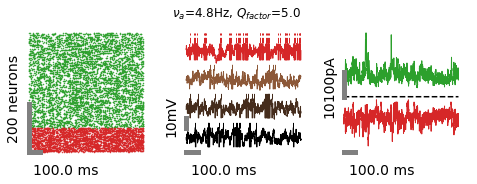

In [41]:
look_at_specific_realisation(Q_FACTOR, 4, 
                             'sparse_vs_balanced/data/dAE_Qfactor_', label='$Q_{factor}$',
                             Faff=5, Tbar=100., Nmax=500)

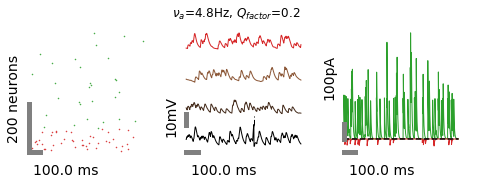

In [40]:
look_at_specific_realisation(Q_FACTOR, 0, 
                             'sparse_vs_balanced/data/dAE_Qfactor_', label='$Q_{factor}$',
                             Faff=5, Tbar=100., Nmax=500)

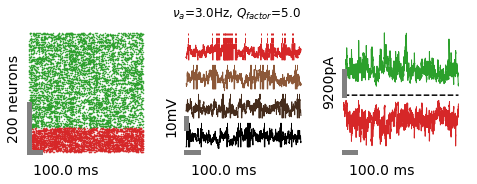

In [36]:
look_at_specific_realisation(Q_FACTOR, 4, 
                             'sparse_vs_balanced/data/dAE_Qfactor_', label='$Q_{factor}$',
                             Faff=0.1, Tbar=100., Nmax=500)

### Varying the strength of the recurrent excitatory synapse only

In [7]:
# factor with which we multiply the default weights
QE_VALUES = [0.5, 1., 2., 4.] # chosen values to investigate

FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for q in QE_VALUES:
    FILENAMES.append('dAE_QeValues_'+str(q)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'Q_RecExc_RecExc':q,
                                         'Q_RecExc_RecInh':q},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_Qe.sh')

In [5]:
print(Analysis_string)

python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_QeValues_0.5.zip & 
python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_QeValues_1.0.zip & 
python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_QeValues_2.0.zip & 
python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_QeValues_4.0.zip & 



In [10]:
fig = plot_effect_of_params(QE_VALUES, 'sparse_vs_balanced/data/dAE_QeValues_', '$Q_e$ (nS)',\
                             yticks=[0.01, 0.1, 1., 10.,100.], yticks_labels=['<0.01', '0.1', '1', '10', '100'])
fig.savefig(desktop+'temp.svg')

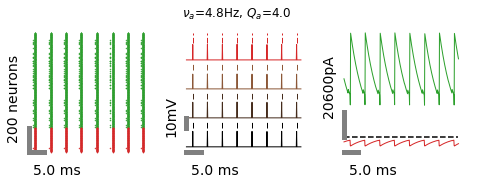

In [25]:
look_at_specific_realisation(QE_VALUES, 3, 
                             'sparse_vs_balanced/data/dAE_QeValues_', 
                             Faff=5., Tbar=5., tzoom=[1000,1040])

### Varying the strength of the inhibitory recurrent synapse only

In [25]:
# factor with which we multiply the default weights
QI_VALUES = [5., 15., 20., 30., 40.] # chosen values to investigate

FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for q in QI_VALUES:
    FILENAMES.append('dAE_QiValues_'+str(q)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'Q_RecInh_RecExc':q,
                                          'Q_RecInh_RecInh':q},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_Qi.sh')

In [14]:
print(Fetch_analysis_string)
#print(Fetch_data_string)

sget sparse_vs_balanced/data/dAE_QiValues_5.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QiValues_10.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QiValues_15.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QiValues_20.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QiValues_30.0_analyzed.npy 
sget sparse_vs_balanced/data/dAE_QiValues_40.0_analyzed.npy 



In [26]:
fig = plot_effect_of_params(QI_VALUES, 'sparse_vs_balanced/data/dAE_QiValues_', '$Q_i$ (nS)',\
                            yticks=[0.01, 0.1, 1., 10.,100.], yticks_labels=['<0.01', '0.1', '1', '10', '100'])
fig.savefig(desktop+'temp.svg')

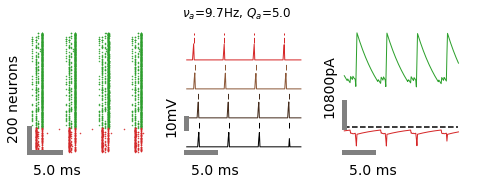

In [28]:
look_at_specific_realisation(QI_VALUES, 0, 
                             'sparse_vs_balanced/data/dAE_QiValues_', 
                             Faff=10, Tbar=5., tzoom=[1000,1020])

### Varying recurrent connectivity

In [36]:
# probability of pairwise connections:
P_CONN = [0.02, 0.05, 0.1, 0.2, 0.5] # chosen values to investigate

FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for p in P_CONN:
    FILENAMES.append('dAE_pconn_'+str(p)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'p_RecExc_RecExc':p, 'p_RecExc_RecInh':p,\
                                          'p_RecInh_RecExc':p, 'p_RecInh_RecInh':p},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_pconn.sh')

In [37]:
print(Fetch_analysis_string)

sget sparse_vs_balanced/data/dAE_pconn_0.02_analyzed.npy 
sget sparse_vs_balanced/data/dAE_pconn_0.05_analyzed.npy 
sget sparse_vs_balanced/data/dAE_pconn_0.1_analyzed.npy 
sget sparse_vs_balanced/data/dAE_pconn_0.2_analyzed.npy 
sget sparse_vs_balanced/data/dAE_pconn_0.5_analyzed.npy 



In [39]:
fig = plot_effect_of_params(P_CONN, 'sparse_vs_balanced/data/dAE_pconn_', 'recurrent \n conn. proba.')
fig.savefig(desktop+'temp.svg')

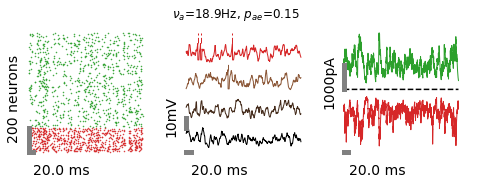

In [28]:
look_at_specific_realisation(P_CONN, 4, 
                             'sparse_vs_balanced/data/dAE_pconn_', label='$p_{a}$',
                             Faff=20, Tbar=20., tzoom=[1000,1500])

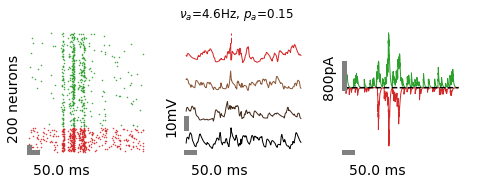

In [33]:
look_at_specific_realisation(P_CONN, 4, 
                             'sparse_vs_balanced/data/dAE_pconn_', label='$p_{a}$',
                             Faff=5, Tbar=50., tzoom=[800,1500], Nmax=5000)

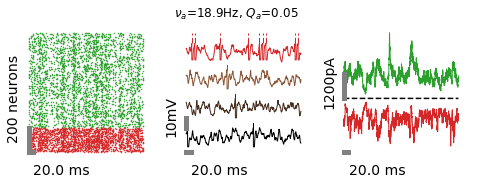

In [44]:
look_at_specific_realisation(P_CONN, 1, 
                             'sparse_vs_balanced/data/dAE_pconn_', 
                             Faff=20, Tbar=20., tzoom=[1000,1500])

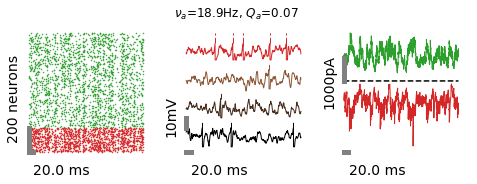

In [43]:
look_at_specific_realisation(P_CONN, 2, 
                             'sparse_vs_balanced/data/dAE_pconn_', 
                             Faff=20, Tbar=20., tzoom=[1000,1500])

### Varying the size of the network

In [48]:
N_FACTOR = [0.5, 1, 2, 4, 8] # chosen values to investigate

from model import Model
FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for nf in N_FACTOR:
    FILENAMES.append('dAE_nfactor_'+str(nf)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({\
                                          'N_RecInh':int(nf*Model['N_RecInh']),\
                                          'N_RecExc':int(nf*Model['N_RecExc'])},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string, tstop=1000.)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_N.sh')

In [54]:
fig = plot_effect_of_params(N_FACTOR, 'sparse_vs_balanced/data/dAE_nfactor_', 'number factor\n($N_{tot})$',\
                            yticks=[0.01, 0.1, 1., 10.], yticks_labels=['<0.01', '0.1', '1', '10'])
fig.savefig(desktop+'temp.svg')

In [33]:
look_at_specific_realisation(N_FACTOR, 1,
                             'sparse_vs_balanced/data/dAE_nfactor_', label='number factor', unit='',
                             Faff=10, Tbar=20., tzoom=[1000,1500])

### Varying the size of the network while keeping the number of synapses (so just to reduce finite-size effects)

In [55]:
N_FACTOR = [0.5, 1, 2, 4, 8] # chosen values to investigate

from model import Model
FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for nf in N_FACTOR:
    FILENAMES.append('dAE_n_pconn_factor_'+str(nf)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({\
                                          'N_RecInh':int(nf*Model['N_RecInh']),
                                          'N_RecExc':int(nf*Model['N_RecExc']),
                                          'p_RecExc_RecExc':Model['p_RecExc_RecExc']/nf,
                                          'p_RecExc_RecInh':Model['p_RecExc_RecInh']/nf,
                                          'p_RecInh_RecExc':Model['p_RecInh_RecExc']/nf,
                                          'p_RecInh_RecInh':Model['p_RecInh_RecInh']/nf},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_N_and_pconn.sh')

In [56]:
fig = plot_effect_of_params(N_FACTOR, 'sparse_vs_balanced/data/dAE_n_pconn_factor_',
                            'number factor \n'+r'$(N_{tot} \propto \frac{1}{p})$',\
                            yticks=[0.01, 0.1, 1., 10.], yticks_labels=['<0.01', '0.1', '1', '10'])
#fig.savefig(desktop+'temp.svg')

### Varying the excitability of the inhibitory cells

In [29]:
VTHRE = [-57, -53, -51, -49] # chosen values to investigate

FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for v in VTHRE:
    FILENAMES.append('dAE_vthreinh_'+str(v)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'RecInh_Vthre':v},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dep_AffExc_scan_varying_VthreInh.sh')

In [30]:
print(Fetch_analysis_string)
print(Analysis_string)

sget sparse_vs_balanced/data/dAE_vthreinh_-57_analyzed.npy 
sget sparse_vs_balanced/data/dAE_vthreinh_-53_analyzed.npy 
sget sparse_vs_balanced/data/dAE_vthreinh_-51_analyzed.npy 
sget sparse_vs_balanced/data/dAE_vthreinh_-49_analyzed.npy 

python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_vthreinh_-57.zip & 
python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_vthreinh_-53.zip & 
python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_vthreinh_-51.zip & 
python sparse_vs_balanced/varying_AffExc.py -a -f sparse_vs_balanced/data/dAE_vthreinh_-49.zip & 



In [33]:
fig = plot_effect_of_params(VTHRE, 'sparse_vs_balanced/data/dAE_vthreinh_', 'inh. $V_{thre}$ (mV)',\
                            yticks=[0.01, 0.1, 1., 10.,100.], yticks_labels=['<0.01', '0.1', '1', '10', '100'])
fig.savefig(desktop+'temp.svg')

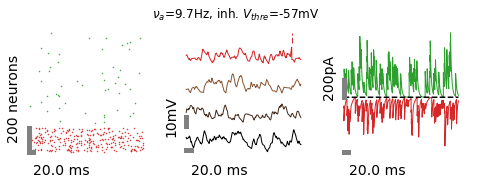

In [8]:
look_at_specific_realisation(VTHRE, 0, 
                             'sparse_vs_balanced/data/dAE_vthreinh_', label='inh. $V_{thre}$', unit='mV',
                             Faff=10, Tbar=20., tzoom=[1000,1500])

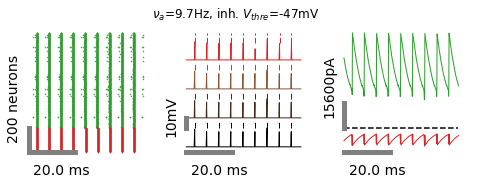

In [10]:
look_at_specific_realisation(VTHRE, 4, 
                             'sparse_vs_balanced/data/dAE_vthreinh_', label='inh. $V_{thre}$', unit='mV',
                             Faff=10, Tbar=20., tzoom=[1000,1050])

### Introducing a disinhibitory population (and varying its coupling to the afferent excitation)

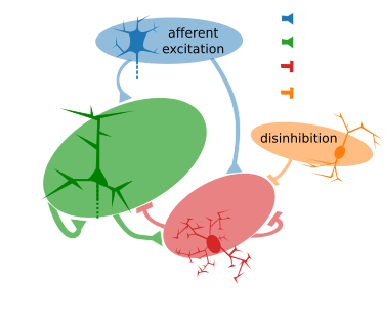

In [13]:
img=mpimg.imread('figures/2pop_with_AffExc_andDsInh.png')
plt.figure(figsize=(8,5));plt.imshow(img);plt.axis('off');

In [3]:
DSNH_AFF_COUPLING = [0.01, 0.05, 0.075, 0.1, 0.2] # chosen values to investigate
DSNH_AFF_COUPLING = [0.01, 0.05, 0.075, 0.1] # chosen values to investigate


FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for p in DSNH_AFF_COUPLING:
    FILENAMES.append('dAE_dsnh_aff_coupling_'+str(p)+'.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'p_AffExc_DsInh':p},\
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/dsnh_loop_strength_scan.sh')

In [135]:
#print(Analysis_string)
print(Fetch_analysis_string)

sget sparse_vs_balanced/data/dAE_dsnh_aff_coupling_0.01_analyzed.npy 
sget sparse_vs_balanced/data/dAE_dsnh_aff_coupling_0.05_analyzed.npy 
sget sparse_vs_balanced/data/dAE_dsnh_aff_coupling_0.075_analyzed.npy 
sget sparse_vs_balanced/data/dAE_dsnh_aff_coupling_0.1_analyzed.npy 
sget sparse_vs_balanced/data/dAE_dsnh_aff_coupling_0.2_analyzed.npy 



In [70]:
fig, ax = plt.subplots(1, figsize=(2, 2))
for i, c in enumerate(DSNH_AFF_COUPLING):
    Fa = np.load('sparse_vs_balanced/data/dAE_dsnh_aff_coupling_'+str(c)+'_analyzed.npy')[0]
    Fd = np.load('sparse_vs_balanced/data/dAE_dsnh_aff_coupling_'+str(c)+'_analyzed.npy')[8]
    Fd[Fd<0.01] = 0.011
    ax.plot(Fa, Fd, color=viridis(i/(len(DSNH_AFF_COUPLING)-1)), lw=2)
ax.set_xscale('log');ax.set_yscale('log')
set_plot(ax, xlabel='$\\nu_a$ (Hz)', ylabel='$\\nu_d$ (Hz)',
         xticks=[2,5,10,20], xticks_labels=['2', '5','10','20'],
         yticks=[0.01, 0.1, 1., 10.], yticks_labels=['<0.01', '0.1', '1', '10'])

NameError: name 'viridis' is not defined

NameError: name 'viridis' is not defined

In [228]:
fig = plot_effect_of_params(DSNH_AFF_COUPLING, 'sparse_vs_balanced/data/dAE_dsnh_aff_coupling_',
                            'conn. proba. \n $p_{ad}$',\
                            yticks=[0.01, 0.1, 1., 10.,100.], yticks_labels=['<0.01', '0.1', '1', '10', '100'])
fig.savefig(desktop+'temp.svg')

In [47]:
look_at_specific_realisation(DSNH_AFF_COUPLING, 2, 
                             'sparse_vs_balanced/data/dAE_dsnh_aff_coupling_',
                             label='$\\nu_d$ / $\\nu_a$', unit='',
                             Faff=20, Tbar=20., tzoom=[900,1000], Nmax=500)

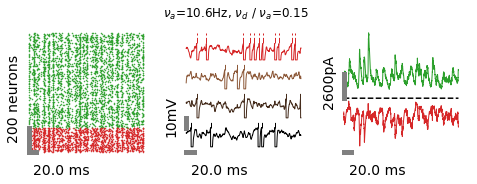

In [48]:
look_at_specific_realisation(DSNH_AFF_COUPLING, 4, 
                             'sparse_vs_balanced/data/dAE_dsnh_aff_coupling_',
                             label='$\\nu_d$ / $\\nu_a$', unit='',
                             Faff=10, Tbar=20., tzoom=[1000,1300])

In [80]:
fig1, ax1 = plt.subplots(1, figsize=(2.5, 2.1))
# ax2=ax1.twinx()
# fig2, ax2 = plt.subplots(1, figsize=(1.6, 2.))
DATA0 = np.load('sparse_vs_balanced/data/dAE_n_pconn_factor_1_analyzed.npy')
DATA1 = np.load('sparse_vs_balanced/data/dAE_dsnh_aff_coupling_0.075_analyzed.npy')
LW=2.5
for data, t in zip([DATA1, DATA0], ['-',':']):
    F_aff = np.unique(data[0])
    seeds = np.arange(int(len(data[0])/len(F_aff)))
    Fe = data[4].reshape((len(F_aff), len(seeds)))
    Fe[Fe<0.01] = 0.012
    ax1.plot(F_aff, Fe.mean(axis=1), t, color=Green, lw=LW, label='$\\nu_e$')
    Fi = data[5].reshape((len(F_aff), len(seeds)))
    Fi[Fi<0.01] = 0.012
    ax1.plot(F_aff, Fi.mean(axis=1), t, color=Red, lw=LW, label='$\\nu_i$')
    Fd = data[8].reshape((len(F_aff), len(seeds)))
    Fd[Fd<0.01] = 0.012
    ax1.plot(F_aff, Fd.mean(axis=1), t, color=Purple, lw=LW, label='$\\nu_d$')
    # Bal = data[3].reshape((len(F_aff), len(seeds)))
    # ax2.plot(F_aff, Bal.mean(axis=1), t, color='k', lw=1, label=label)
ax1.set_xscale('log');ax1.set_yscale('log')
set_plot(ax1, xlabel='$\\nu_a$ (Hz)', ylabel='rate (Hz)',
         xticks=[2,5,10,20], xticks_labels=['2', '5','10','20'],
         yticks=[0.01, 0.1, 1., 10., 20., 30., 40., 50., 60.],
         yticks_labels=['<0.01', '0.1', '1', '10', '', '', '', '', ''])
ax1.set_xlim([F_aff.min(), F_aff.max()])
ax1.legend()
# ax2.set_xscale('log')
# set_plot(ax2, ['right'], xlabel='$\\nu_a$ (Hz)', ylabel='$\| I_i $/$I_e\|$',
#          xticks=[2,5,10,20], xticks_labels=['2', '5','10','20'],
#          yticks=[0., 0.5, 1.], ylim=[-.1,1.1])
# ax2.set_xlim([F_aff.min(), F_aff.max()])
# ax2.legend()
fig1.savefig(desktop+'temp.svg')
# fig2.savefig(desktop+'temp2.svg')


# Effect of a time varying afferent excitation

In [1]:
%matplotlib inline

In [2]:
from model import Model, pass_arguments_of_new_model
Model2 = Model.copy()
Model2['p_AffExc_DsInh'] = 0.075
Model2['p_DsInh_RecInh'] = 0.05
Model2['zip_filename'] = 'sparse_vs_balanced/data/time_varying_input.zip'
Model2['Faff1'], Model2['Faff2'], Model2['Faff3'] = 4., 18., 8.
tf_file = 'sparse_vs_balanced/effect_of_strong_afferent.py'
S = ''
S += ' python '+tf_file+pass_arguments_of_new_model(Model2)
S += ' --SEEDS'
for s in np.arange(10): S += ' '+str(s)
S += ' -df sparse_vs_balanced/data/ -rm'

bash_file = open('sparse_vs_balanced/bash_scan/time_varying_input_scan.sh', 'w')
bash_file.write(S)
bash_file.close()

print('sget sparse_vs_balanced/data/time_varying_input.zip')

sget sparse_vs_balanced/data/time_varying_input.zip


In [6]:
%matplotlib inline
import os                 
from graphs.my_graph import * # my custom module for ~nice plots
desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')+os.path.sep
from sparse_vs_balanced.effect_of_strong_afferent import get_scan
Model, seeds, DATA = get_scan({}, filename='sparse_vs_balanced/data/time_varying_input.zip')

In [7]:
from sparse_vs_balanced.effect_of_strong_afferent import conductance_time_course
fig, ax = conductance_time_course(DATA, Model, smoothing=20,
                                  YTICKS=[0, 4, 8], FIGSIZE=(2.6,1.4))
ax.set_ylim([-.1, 9])
fig.savefig(desktop+'temp.svg')

In [8]:
ax.set_ylim([-.1, 15])
fig.savefig(desktop+'temp.svg')

In [10]:
ax.set_yscale('log')
fig

In [2]:
from sparse_vs_balanced.effect_of_strong_afferent import pop_act_time_course
fig = pop_act_time_course(DATA, Model, t0=0., smoothing=10,
                          lower_lim=0.012,
                          YTICKS=[0.01, 0.1, 1., 10.],
                          YTICKS_LABELS=['<0.01','0.1','1', '10'], FIGSIZE=(6,1.5));
fig.savefig(desktop+'temp.svg')

In [3]:
from sparse_vs_balanced.effect_of_strong_afferent import aff_pop_time_course
fig = aff_pop_time_course(Model, t0=0.,
                          FIGSIZE=(6,1.), YTICKS=[0, 10, 20], XBAR=300);
fig.savefig(desktop+'temp.svg')

In [7]:
from sparse_vs_balanced.effect_of_strong_afferent import get_scan, one_Vm_fig
fig = one_Vm_fig(DATA[7], Model, vpeak=-38.,
                 FIGSIZE=(6,5.), t0=0,
                 iNVm_Inh=1, iNVm_DsInh=0, iNVm_Exc=[36, 34, 32], blank_spike=10)
fig.savefig(desktop+'temp.svg')

In [8]:
from sparse_vs_balanced.effect_of_strong_afferent import hist_of_Vm, get_scan
Model, seeds, DATA = get_scan({}, filename='sparse_vs_balanced/data/time_varying_input.zip')
fig, [std_stim, std_pre] = hist_of_Vm(DATA, Model, nbin=18, tstart=200, tdur=400, FIGSIZE=(2.2,2.2));
#fig.savefig(desktop+'temp.svg')

NameError: name 't2' is not defined

NameError: name 't2' is not defined

In [24]:
fig, ax = plt.subplots(figsize=(0.6,1.3))
plt.bar([0], [std_pre], color=Blue)
plt.bar([1], [std_stim], color=Orange)
set_plot(ax, ['left'], xticks=[], yticks=[0,2,4], ylabel='$\sigma_V$ (mV)')
fig.savefig(desktop+'temp.svg')

# Response to time varying envelopes

In [2]:
from model import pass_arguments_of_new_model, Model
import os
def build_varying_envelope_scan(faff_bsl, faff0, faff1, discretization, Nseed, filename):
    from model import pass_arguments_of_new_model, Model
    Model2 = Model.copy()
    Model2['p_AffExc_DsInh'] = 0.075
    Model2['tstop'] = 2000.
    S = 'python sparse_vs_balanced/varying_rate_envelope.py '+pass_arguments_of_new_model(Model2)
    S += ' --SEEDS'
    for s in np.arange(1, Nseed+1): S += ' '+str(s)
    S += ' --faff_bsl '+str(faff_bsl)
    S += ' --faff0 '+str(faff0)
    S += ' --faff1 '+str(faff1)
    S += ' -N '+str(discretization)
    S += ' -f sparse_vs_balanced/data'+os.path.sep+filename+' & \n'
    print('sget sparse_vs_balanced/data'+os.path.sep+filename)
    return S
S1 = build_varying_envelope_scan(4., 0.1, 7, 10, 10, 'varying_rate_envelopes_SA.zip')    
S2 = build_varying_envelope_scan(14., 0.1, 7, 10, 10, 'varying_rate_envelopes_BA.zip')    
bash_file = open('sparse_vs_balanced/bash_scan/various_rate_envelopes.sh', 'w')
bash_file.write(S1+S2)
bash_file.close()

sget sparse_vs_balanced/data/varying_rate_envelopes_SA.zip
sget sparse_vs_balanced/data/varying_rate_envelopes_BA.zip


In [4]:
from sparse_vs_balanced.varying_rate_envelope import get_scan, make_single_resp_fig

F_aff, seeds, _, DATA_SA = get_scan({}, filename='sparse_vs_balanced/data/varying_rate_envelopes_SA.zip')
F_aff, seeds, Model, DATA_BA = get_scan({}, filename='sparse_vs_balanced/data/varying_rate_envelopes_BA.zip')    

In [5]:
from data_analysis.processing.signanalysis import gaussian_smoothing
import matplotlib.cm as cm
from graphs.my_graph import *
                 
def make_single_resp_fig(F_aff, seeds, Model, DATA_SA, DATA_BA,
                         smoothing = 30, t0 = 430, XTICKS=np.arange(4)*250,
                         tstart_vis = 350, tend_vis=700, t_after_stim_for_bsl=1400.):
    
    fig1, ax1 = plt.subplots(1, figsize=(4,2.5))
    plt.subplots_adjust(left=.3, bottom=.4)
    fig2, ax2 = plt.subplots(1, figsize=(4,2.5))
    plt.subplots_adjust(left=.3, bottom=.4)
    fig3, ax3 = plt.subplots(1, figsize=(4,2.5))
    plt.subplots_adjust(left=.3, bottom=.4)

    SA_TRACES, BA_TRACES = [[] for i in range(len(F_aff))], [[] for i in range(len(F_aff))]
    for i in range(len(F_aff)):
        for j in range(len(seeds)):
            data = DATA_SA[i*len(seeds)+j]
            v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
            SA_TRACES[i].append(v)
            data = DATA_BA[i*len(seeds)+j]
            v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
            BA_TRACES[i].append(v)
        SA_mean, SA_std = np.array(SA_TRACES[i]).mean(axis=0), np.array(SA_TRACES[i]).std(axis=0)
        BA_mean, BA_std = np.array(BA_TRACES[i]).mean(axis=0), np.array(BA_TRACES[i]).std(axis=0)
        data = DATA_SA[i*len(seeds)+j]
        cond, cond2 = (data['t']>tstart_vis) & (data['t']<tend_vis) ,data['t']>t_after_stim_for_bsl
        ax2.plot(data['t'][cond]-t0,
                 SA_mean[cond]-SA_mean[cond2].mean(), color=cm.viridis(i/len(F_aff)), lw=2)
        ax2.fill_between(data['t'][cond]-t0,
                         SA_mean[cond]-SA_std[cond]-SA_mean[cond2].mean(),
                         SA_mean[cond]+SA_std[cond]-SA_mean[cond2].mean(),
                         color=cm.viridis(i/len(F_aff)), alpha=.5)
        ax3.plot(data['t'][cond]-t0,
                 BA_mean[cond]-BA_mean[cond2].mean(), color=cm.viridis(i/len(F_aff)), lw=2)
        ax3.fill_between(data['t'][cond]-t0,
                         BA_mean[cond]-BA_std[cond]-BA_mean[cond2].mean(),
                         BA_mean[cond]+BA_std[cond]-BA_mean[cond2].mean(),
                         color=cm.viridis(i/len(F_aff)), alpha=.5)
        ax1.plot(data['t'][cond]-t0,
                 data['faff'][cond]-data['faff'][cond2].mean(), color=cm.viridis(i/len(F_aff)), lw=3)
    set_plot(ax1, xlabel='time (ms)', ylabel='$\delta \\nu_a$  (Hz)', xticks=XTICKS, yticks=[0,3,6])
    set_plot(ax2, xlabel='time (ms)', ylabel='$\delta \\nu_e$ (Hz)', xticks=XTICKS, yticks=[0,4,8])
    set_plot(ax3, xlabel='time (ms)', ylabel='$\delta \\nu_e$ (Hz)', xticks=XTICKS, yticks=[0,12,24])
    return fig1, fig2, fig3, SA_TRACES, BA_TRACES

fig1, fig2, fig3, SA_TRACES, BA_TRACES =\
                make_single_resp_fig(F_aff[1::2], seeds, Model, DATA_SA[1::2], DATA_BA[1::2],
                                        smoothing = 30, t0 = 300, XTICKS=np.arange(3)*500,
                                        t_after_stim_for_bsl=1600.,
                                        tstart_vis = 100, tend_vis=1700);

In [17]:
def get_traces(F_aff, seeds, Model, DATA_SA, DATA_BA,
               smoothing = 30, tstart_vis = 350, tend_vis=700):
    
    SA_TRACES, BA_TRACES = [[] for i in range(len(F_aff))], [[] for i in range(len(F_aff))]
    for i in range(len(F_aff)):
        for j in range(len(seeds)):
            data = DATA_SA[i*len(seeds)+j]
            cond = (data['t']>tstart_vis) & (data['t']<tend_vis)
            v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
            SA_TRACES[i].append(v[cond])
            data = DATA_BA[i*len(seeds)+j]
            v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
            BA_TRACES[i].append(v[cond])
    return SA_TRACES, BA_TRACES

SA_TRACES, BA_TRACES =\
                 get_traces(F_aff, seeds, Model, DATA_SA, DATA_BA,
                            smoothing = 10, tstart_vis = 100, tend_vis=1700);

In [18]:
Ntraining = 10
import pymuvr
from sklearn.neighbors import KNeighborsClassifier
def my_metric(x1, x2):
    # return np.mean(np.abs(x2-x1))/np.sqrt(np.std(x2)*np.std(x1))
    return np.mean(np.abs(x2-x1))

# Itraining = np.random.choice(range(len(SA_TRACES[0])), Ntraining, replace=False)

output = {'SA':{}, 'BA':{}}

for key in ['SA', 'BA']:
    output[key]['ID_TEST_SET'] = []
    output[key]['PREDICTED'] = []
    output[key]['single_accuracy'] = []


for itraining in np.arange(len(SA_TRACES[0])):                  
    Itraining =  [itraining]
    for key, TRACES in zip(['SA', 'BA'],
                           [SA_TRACES, BA_TRACES]):
        neigh = KNeighborsClassifier(n_neighbors=1, metric=my_metric) # metric is a simple dot product
        ID_TRAINING_SET, TRAINING_SET = [], []
        ID_TEST_SET, TEST_SET = [], []
        for i in range(len(TRACES)):                 
            for j in Itraining:
                ID_TRAINING_SET.append(i)
                TRAINING_SET.append(TRACES[i][j])
            for j in np.delete(range(len(TRACES[i])), Itraining):
                ID_TEST_SET.append(i)
                TEST_SET.append(TRACES[i][j])
        neigh.fit(TRAINING_SET, ID_TRAINING_SET)

        output[key]['ID_TEST_SET'].append(ID_TEST_SET)
        output[key]['PREDICTED'].append(neigh.predict(TEST_SET))
        output[key]['single_accuracy'].append([])
        for k in np.unique(output[key]['ID_TEST_SET'][-1]):
            i0 = np.argwhere(np.array(output[key]['ID_TEST_SET'][-1])==k).flatten()
            output[key]['single_accuracy'][-1].append(0)
            for i in i0:
                if output[key]['PREDICTED'][-1][i]==k:
                     output[key]['single_accuracy'][-1][-1] += 1./len(i0)
                 

In [22]:
# making accuracy fig
Blue, Orange = '#1f77b4', '#ff7f0e'
from scipy.stats import ttest_rel

for key in ['SA', 'BA']:
    output[key]['accuracy'] = np.mean(output[key]['single_accuracy'], axis=1)
                 
res = ttest_rel(output['SA']['accuracy'], output['BA']['accuracy'])
print(res)
fig = plt.figure(figsize=(1.3, 2.))        
plt.bar([0], [100.*np.array(output['SA']['accuracy']).mean()], yerr=[100.*np.array(output['SA']['accuracy']).std()], color=Blue, width=.6)
plt.bar([1], [100.*np.array(output['BA']['accuracy']).mean()], yerr=[100.*np.array(output['BA']['accuracy']).std()], color=Orange, width=.6)
plt.bar([.5], [100*1./len(np.unique(output['SA']['ID_TEST_SET']))], width=2, color='lightgray')
plt.annotate('chance', (-0.1, 1))
plt.plot([0,1], [110, 110], 'k-', lw=1)
plt.annotate('p=%.1e' % res.pvalue, (-0.2, 113))
plt.plot([-.5, 1.5], 100*1./len(np.unique(ID_TEST_SET))*np.ones(2), 'k--', lw=.5)
# plt.legend()
set_plot(plt.gca(), xticks=[0,1], xticks_labels=['SA', 'BA'], ylabel='decoding \n accuracy (%)')
fig.savefig(desktop+'temp.svg')
print('SA regime: ', 100.*np.array(output['SA']['accuracy']).mean(), '+/-', 100.*np.array(output['SA']['accuracy']).std(), '%')
print('BA regime: ', 100.*np.array(output['BA']['accuracy']).mean(), '+/-', 100.*np.array(output['BA']['accuracy']).std(), '%')

Ttest_relResult(statistic=-2.6427049642730318, pvalue=0.026794699987503209)
SA regime:  61.4444444444 +/- 10.4000237417 %
BA regime:  74.6666666667 +/- 7.38366565593 %


In [41]:
from graphs.plot_export import put_list_of_figs_to_svg_fig
put_list_of_figs_to_svg_fig([fig1, fig2, fig3], fig_name=desktop+'temp.svg')

In [42]:
def get_corrcoef(F_aff, seeds, Model, DATA_SA, DATA_BA,
                  smoothing = 30, t0 = 430, XTICKS=np.arange(4)*250,
                  tstart_vis = 350, tend_vis=700, t_after_stim_for_bsl=1400.):
    SA_CC, BA_CC = [], []
    SA_CC_full, BA_CC_full = [], []
    for i in range(len(F_aff)):
        SA_TRACES, BA_TRACES = [], []
        for j in range(len(seeds)):
            data = DATA_SA[i*len(seeds)+j]
            cond = (data['t']>tstart_vis) & (data['t']<tend_vis)
            v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
            SA_TRACES.append(v)
            SA_CC_full.append(np.corrcoef(v[cond], data['faff'][cond])[0, 1])
            data = DATA_BA[i*len(seeds)+j]
            v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
            BA_TRACES.append(v)
            BA_CC_full.append(np.corrcoef(v[cond], data['faff'][cond])[0, 1])
        SA_mean, SA_std = np.array(SA_TRACES).mean(axis=0), np.array(SA_TRACES).std(axis=0)
        BA_mean, BA_std = np.array(BA_TRACES).mean(axis=0), np.array(BA_TRACES).std(axis=0)
        data = DATA_SA[i*len(seeds)+j]
        cond, cond2 = (data['t']>tstart_vis) & (data['t']<tend_vis) ,data['t']>t_after_stim_for_bsl
        SA_CC.append(np.corrcoef(SA_mean[cond], data['faff'][cond])[0, 1])
        BA_CC.append(np.corrcoef(BA_mean[cond], data['faff'][cond])[0, 1])
    return SA_CC, BA_CC, SA_CC_full, BA_CC_full

SA_CC, BA_CC, SA_CC_full, BA_CC_full = get_corrcoef(F_aff, seeds, Model, DATA_SA, DATA_BA)

In [43]:
print(np.mean(SA_CC_full), np.std(SA_CC_full))
print(np.mean(BA_CC_full), np.std(BA_CC_full))
ttest_rel(np.array(SA_CC_full).flatten(), np.array(BA_CC_full).flatten())

Ttest_relResult(statistic=-2.9132781502798539, pvalue=0.0044211787302844184)

0.806312899094 0.257992507534
0.865290460052 0.234739040896


In [44]:
t0 = 300
window = [150, 500] # decoding window
window_cc = [-150, 1200] # decoding window
smoothing = 10

# rate response at temporal center of stim
SA_RATE, BA_RATE = np.zeros((len(F_aff), len(seeds))), np.zeros((len(F_aff), len(seeds)))
# cross correlation coefficient
FA = []
SA_CC, BA_CC = np.zeros((len(F_aff), len(seeds))), np.zeros((len(F_aff), len(seeds)))
SA_CC2, BA_CC2 = [], []
for i in range(len(F_aff)):
    SA_TRACES, BA_TRACES = [], []
    for j in range(len(seeds)):
        # SA
        data = DATA_SA[i*len(seeds)+j]
        cond = (data['t']>t0+window[0]) & (data['t']<t0+window[1])
        # cond2 = (data['t']<250) & (data['t']>100) # for baseline activity
        cond2 = (data['t']>1500) # for baseline activity
        cond3 = (data['t']>t0+window_cc[0]) & (data['t']<t0+window_cc[1])
        # input
        Input = data['faff'][cond3]-data['faff'][cond2].mean()
        # SA
        SA_RATE[i,j] = data['POP_ACT_RecExc'][cond].mean()-data['POP_ACT_RecExc'][cond2].mean()
        v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
        SA_TRACES.append(v-v[cond2].mean())
        SA_CC[i,j] = np.abs(np.corrcoef(v[cond3], Input)[0,1])
        # BA
        data = DATA_BA[i*len(seeds)+j]
        BA_RATE[i,j] = data['POP_ACT_RecExc'][cond].mean()-data['POP_ACT_RecExc'][cond2].mean()
        v = gaussian_smoothing(data['POP_ACT_RecExc'],int(smoothing/Model['dt']))
        BA_TRACES.append(v-v[cond2].mean())
        BA_CC[i,j] = np.abs(np.corrcoef(v[cond3], Input)[0,1])
    SA_mean, SA_std = np.array(SA_TRACES).mean(axis=0), np.array(SA_TRACES).std(axis=0)
    BA_mean, BA_std = np.array(BA_TRACES).mean(axis=0), np.array(BA_TRACES).std(axis=0)
    SA_CC2.append(np.corrcoef(SA_mean[cond3]/SA_mean[cond3].max(), Input)[0, 1])
    BA_CC2.append(np.corrcoef(BA_mean[cond3]/BA_mean[cond3].max(), Input)[0, 1])


In [45]:
fig1, ax1 = plt.subplots(1, figsize=(2.1,3.))
plt.subplots_adjust(left=.3, bottom=.4)
for rate, color, label in zip([SA_RATE, BA_RATE], [Blue, Orange], ['SA', 'BA']):
    mean, std = rate.mean(axis=1), rate.std(axis=1)
    ax1.errorbar(F_aff, mean, std, color=color, lw=4, label=label)
ax1.legend(loc=(.4,1.1))
set_plot(ax1, ylabel=r'$\langle \delta \nu_e \rangle_{T}$ (Hz)',
         xlabel='$\delta \\nu_a^{max}$ (Hz)', xticks = [1, 4, 7], yticks=[0,10,20])
fig1.savefig(desktop+'temp.svg')

In [46]:
fig1, ax1 = plt.subplots(1, figsize=(1.3,1.9))
plt.subplots_adjust(left=.3, bottom=.4)
for rate, color, label in zip([SA_RATE, BA_RATE], [Blue, Orange], ['SA', 'BA']):
    mean, std = rate.mean(axis=1), rate.std(axis=1)
    ax1.errorbar(F_aff, mean, std, color=color, lw=2, label=label)
ax1.legend(loc=(.4,1.1))
set_plot(ax1, ['right', 'bottom'],
                    ylabel=r'$\langle \delta \nu_e \rangle_{T}$ (Hz)',
         xlabel='$\delta \\nu_a^{max}$ (Hz)', xticks = [1, 4, 7], yticks=[0,10,20])
fig1.savefig(desktop+'temp.svg')

In [47]:
# determine the gain
SA_GAIN, BA_GAIN = [], []                 
for GAIN, RATE, col in zip([SA_GAIN, BA_GAIN], [SA_RATE, BA_RATE], [Blue, Orange]):
    for seed in range(np.shape(RATE)[1])[:5]:
        vec = np.array([RATE[i][seed] for i in range(len(F_aff))])
        GAIN.append(np.polyfit(F_aff, vec, 1)[0])            
        plt.plot(F_aff, vec, '-', F_aff, np.polyval(np.polyfit(F_aff, vec, 1), F_aff), ':', color=col)

In [48]:
# making gain fig
Blue, Orange = '#1f77b4', '#ff7f0e'
from scipy.stats import ttest_rel

res = ttest_rel(SA_GAIN, BA_GAIN)
print(res)
fig = plt.figure(figsize=(1.3, 2.))        
plt.bar([0], [np.array(SA_GAIN).mean()], yerr=[np.array(SA_GAIN).std()], color=Blue, width=.6)
plt.bar([1], [np.array(BA_GAIN).mean()], yerr=[np.array(BA_GAIN).std()], color=Orange, width=.6)
plt.plot([0.,1], np.ones(2)*plt.gca().get_ylim()[1], 'k-', lw=1)
plt.annotate('p=%.0e' % res.pvalue, (-0.2, plt.gca().get_ylim()[1]))
set_plot(plt.gca(), xticks=[0,1], xticks_labels=['SA', 'BA'], ylabel='Gain (Hz/Hz)', yticks=[0,1,2,3])
fig.savefig(desktop+'temp.svg')

Ttest_relResult(statistic=-36.622026718951147, pvalue=3.3191436541874868e-06)


In [49]:
from graphs.plot_export import put_list_of_figs_to_svg_fig
from scipy.stats import ttest_ind
fig, ax = plt.subplots(1, figsize=(1.5,1.5))
plt.subplots_adjust(left=.3, bottom=.4)
for cc, color, label in zip([SA_CC, BA_CC], [Blue, Orange], ['SA', 'BA']):
    ax.errorbar(F_aff, cc.mean(axis=1), cc.std(axis=1), color=color, lw=2)
for i in range(len(F_aff)):
    res= ttest_rel(SA_CC[i,:], BA_CC[i,:])
    if (res.statistic<0) and (res.pvalue<1e-3):
        ax.plot([F_aff[i]], [0.2], 'k*', ms=3)
    if (res.statistic>0) and (res.pvalue<1e-3):
        ax.plot([F_aff[i]], [1.], 'k*', ms=3)
# ax.set_yscale('log')
ax.plot(F_aff[:2], [0,1], 'w.', ms=0, lw=0)
set_plot(ax, ylabel='cc coef',
         xlabel='$\delta \\nu_a^{max}$', xticks = [1, 7], yticks=[0,1], ylim=[0.1, 1.1])
fig.savefig(desktop+'temp.svg')

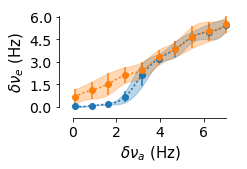

In [36]:
###################################
# making a quadratic interpolation
# of the mean and variance
###################################

from scipy.interpolate import interp1d
f_mean_sa = interp1d(F_aff, SA_RATE.mean(axis=1), kind='cubic')
f_std_sa = interp1d(F_aff, SA_RATE.std(axis=1), kind='cubic')
f_mean_ba = interp1d(F_aff, BA_RATE.mean(axis=1), kind='cubic')
f_std_ba = interp1d(F_aff, BA_RATE.std(axis=1), kind='cubic')
F_aff_HD = np.linspace(F_aff.min(), F_aff.max(), 100)

fig1, ax1 = plt.subplots(1, figsize=(4,3.))
plt.subplots_adjust(left=.3, bottom=.4)
ax1.errorbar(F_aff, SA_RATE.mean(axis=1), yerr=SA_RATE.std(axis=1), color=Blue, fmt='o')
ax1.plot(F_aff_HD, f_mean_sa(F_aff_HD), ':', color=Blue)
ax1.fill_between(F_aff_HD,
                 f_mean_sa(F_aff_HD)-f_std_sa(F_aff_HD),f_mean_sa(F_aff_HD)+f_std_sa(F_aff_HD),
                 alpha=.3, color=Blue)
ax1.errorbar(F_aff, BA_RATE.mean(axis=1), yerr=BA_RATE.std(axis=1), color=Orange, fmt='o')
ax1.plot(F_aff_HD, f_mean_ba(F_aff_HD), ':', color=Orange)
ax1.fill_between(F_aff_HD,
                 f_mean_ba(F_aff_HD)-f_std_ba(F_aff_HD),f_mean_ba(F_aff_HD)+f_std_ba(F_aff_HD),
                 alpha=.3, color=Orange)
set_plot(ax1, ylabel='$\delta \\nu_e$ (Hz)', xlabel='$\delta \\nu_a$ (Hz)')

In [37]:
###################################
# Computing Fisher information
###################################

def Fisher_Information(S, MEAN_FUNC, STD_FUNC):
    """
    Computes the Fisher information given a set of gaussian observations

    those observations are described by two functions of the stimulus
    value S, the mean MEAN_FUNC and standard deviation STD_FUNC
    """

    def gaussian_proba(r, mean, std):
        """ return the gaussian probability"""
        return np.exp(-(r-mean)**2/2./std**2)/np.sqrt(2.*np.pi)/std

    # we'll need a function that gives the simulus derivative
    # of the log of the conditional probability P(resp|stim)
    def deriv_log_pRS(r, s, ds=(S[1]-S[0])/10.):
        """ discrete derivation"""
        mean_minus, std_minus = MEAN_FUNC(s-ds), STD_FUNC(s-ds)
        mean_plus, std_plus = MEAN_FUNC(s+ds), STD_FUNC(s+ds)
        log_plus = np.log(gaussian_proba(r, mean_plus, std_plus))
        log_minus = np.log(gaussian_proba(r, mean_minus, std_minus))
        return (log_plus-log_minus)/ds
    
    Fisher_Info = 0.*S
    for i in range(1, len(S)-1):
        mean, std = MEAN_FUNC(S[i]), STD_FUNC(S[i])
        x_integral = np.linspace(mean-4*std, mean+4*std, 100) # integration space
        deriv_log_p = np.array([deriv_log_pRS(x, S[i]) for x in x_integral])
        proba = gaussian_proba(x_integral, mean, std)
        Fisher_Info[i] = np.trapz(proba*deriv_log_p**2, x_integral)
    return Fisher_Info    

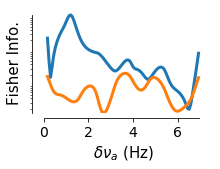

In [38]:
fig1, ax1 = plt.subplots(1, figsize=(4,3.))
plt.subplots_adjust(left=.3, bottom=.4)

ax1.plot(F_aff_HD[1:-1], Fisher_Information(F_aff_HD, f_mean_sa, f_std_sa)[1:-1], color=Blue, lw=3)
ax1.plot(F_aff_HD[1:-1], Fisher_Information(F_aff_HD, f_mean_ba, f_std_ba)[1:-1], color=Orange, lw=3)

plt.yscale('log')
set_plot(ax1, xlabel='$\delta \\nu_a$ (Hz)', ylabel='Fisher Info.', yticks=[]);

In [239]:
%matplotlib inline
from sparse_vs_balanced.varying_rate_envelope import analyze_scan
analyze_scan({}, filename='sparse_vs_balanced/data/varying_rate_envelopes_SA.zip')
analyze_scan({}, filename='sparse_vs_balanced/data/varying_rate_envelopes_BA.zip');

(<matplotlib.figure.Figure at 0x1116fb668>,
 <matplotlib.figure.Figure at 0x117ba1fd0>)

Done with analysis, now plotting and pdf export [...]
Done with analysis, now plotting and pdf export [...]


# Response to sparse spiking patterns

In [1]:
from model import pass_arguments_of_new_model, Model
import os
def build_varying_pattern_scan(faff_bsl, discretization, Nseed, filename):
    from model import pass_arguments_of_new_model, Model
    Model2 = Model.copy()
    Model2['p_AffExc_DsInh'] = 0.075
    S = 'python sparse_vs_balanced/sparse_spiking_input.py '+pass_arguments_of_new_model(Model2)
    S += ' --SEEDS'
    for s in np.arange(10, Nseed+10): S += ' '+str(s)
    S += ' --faff_bsl '+str(faff_bsl)
    S += ' -N '+str(discretization)
    S += ' -f sparse_vs_balanced/data'+os.path.sep+filename+' \n'
    print('sget sparse_vs_balanced/data'+os.path.sep+filename)
    return S
S1 = build_varying_pattern_scan(4., 10, 20, 'sparse_input_SA.zip')    
S2 = build_varying_pattern_scan(14., 10, 20, 'sparse_input_BA.zip')    
bash_file = open('sparse_vs_balanced/bash_scan/sparse_spiking.sh', 'w')
bash_file.write(S1+S2)
bash_file.close()

sget sparse_vs_balanced/data/sparse_input_SA.zip
sget sparse_vs_balanced/data/sparse_input_BA.zip


In [3]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

t_pre, t_post = 100, 100 # we also considered 100 ms around the stim

Patterns, seeds, _, DATA_SA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA.zip')
F_aff, seeds, Model, DATA_BA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_BA.zip')

Ntraining = int(len(seeds)/3) # one third of the data

PRESYNAPTIC_PATTERNS_TRAINING = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING = [], []

PRESYNAPTIC_PATTERNS_TEST = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TEST, BA_PATTERNS_TEST = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER = []

Ntest = len(seeds)-Ntraining # the rest of the data

for i in range(len(Patterns)):
    # TRAINING SET
    for j in range(Ntraining): # seeds only in the first training seet
        # first loop for training
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA], [SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) &\
                (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
        PRESYNAPTIC_PATTERNS_TRAINING.append(i)
    # TEST SET
    for j in range(Ntraining, len(seeds)): # seeds only in the test set
        # second loop for tests
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA], [SA_PATTERNS_TEST, BA_PATTERNS_TEST]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) & (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                                  (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
        PRESYNAPTIC_PATTERNS_TEST.append(i) # A simple index accounts for the 
    ## AFFERENT SPIKES
    ## We also collect the afferent stimulus (identical on all seeds, so we take it on the last 'j' seed)
    RASTER = []
    for n in np.arange(Model['N_target']):
        Nrn = []
        i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
        Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
        RASTER.append(Nrn)
    PRESYNAPTIC_PATTERNS_RASTER.append(RASTER)
        

In [4]:
"""
Plotting raster activity (input and network response)
"""
%matplotlib inline
import matplotlib.cm as cm

def show_presynaptic_activity_over_trials(PRESYNAPTIC_PATTERNS_RASTER, pattern_id=0,
                                          nrn_ids=np.arange(10), Nbar=10,
                                          trial_max=20, sep_factor=1., ms=4):
    fig, ax = plt.subplots(figsize=(2.5,2.1))
    ax.plot([-t_pre, Model['time_span']+t_post], [0,0], 'w.', ms=0.1)
    for k, n in enumerate(nrn_ids):
        tspikes = np.array(PRESYNAPTIC_PATTERNS_RASTER[pattern_id][n])
        plt.plot(tspikes-Model['t0'], k+0.*tspikes, 'k.', ms=ms)
    x1, x2 = ax.get_xlim()
    # for n in range(len(nrn_ids)):
    #     ax.fill_between([x1, x2], n*sep_factor*np.ones(2), (n*sep_factor+1)*np.ones(2), color=cm.copper(1.-n/(len(nrn_ids)-1)/1.5))
    ax.plot([0,0], [0, Nbar], '-', color='grey', lw=4)
    ax.annotate(str(Nbar)+'neurons', (0, ax.get_ylim()[1]/2.5), rotation=90, fontsize=14)
    ax.plot([0, Model['time_span']], [0,0], '-', color='grey', lw=8, alpha=.5)
    set_plot(ax, ['bottom'], yticks=[],
             xlabel='time (ms)',
             xlim=[-t_pre, Model['time_span']+t_post], xticks=np.arange(3)*250)
    return fig

def show_spiking_activity_over_trials(TRAINING_PATTERN, TEST_PATTERN, pattern_id=0,
                                      Ntraining=Ntraining, Ntest=Ntest, nrn_ids=np.arange(10),
                                      trial_max=20, sep_factor=1.2, ms=4):
    fig, ax = plt.subplots(figsize=(2.5,2.1))
    ax.plot([-t_pre, Model['time_span']+t_post], [0,0], 'w.', ms=0.1)
    for j in np.arange(min([Ntraining, trial_max])):
        for k, n in enumerate(nrn_ids):
            tspikes = np.array(TRAINING_PATTERN[pattern_id*Ntraining+j][n])
            plt.plot(tspikes-Model['t0'], k*sep_factor*trial_max+j+0.*tspikes, 'k.', ms=ms)
    for j, l in enumerate(np.arange(Ntraining, min([Ntraining+Ntest, trial_max]))):
        for k, n in enumerate(nrn_ids):
            tspikes = np.array(TEST_PATTERN[pattern_id*Ntest+j][n])
            plt.plot(tspikes-Model['t0'], k*sep_factor*trial_max+l+0.*tspikes, 'k.', ms=ms)
    x1, x2 = ax.get_xlim()
    N = np.arange(len(nrn_ids))
    # np.random.seed(1);np.random.shuffle(N)
    for i, n in enumerate(N):
        ax.fill_between([x1, x2], n*sep_factor*trial_max*np.ones(2), (n*sep_factor+1)*trial_max*np.ones(2),
                        color=cm.copper(1.-i/(len(nrn_ids)-1)/2.))
    ax.plot([0,0], [0, min([Ntraining+Ntest, trial_max])], '-', color='grey', lw=4)
    ax.annotate(str(min([Ntraining+Ntest, trial_max]))+'trials', (0, ax.get_ylim()[1]/2.5), rotation=90, fontsize=14)
    ax.plot([0, Model['time_span']], [0,0], '-', color='grey', lw=8, alpha=.5)
    set_plot(ax, ['bottom'], yticks=[],
             xlabel='time (ms)',
             xlim=[-t_pre, Model['time_span']+t_post], xticks=np.arange(3)*250)
    return fig


In [5]:
PATTERN_ID = 4
fig1 = show_presynaptic_activity_over_trials(PRESYNAPTIC_PATTERNS_RASTER, nrn_ids=np.arange(100), pattern_id=PATTERN_ID,
                                             ms=3)
fig2 = show_spiking_activity_over_trials(SA_PATTERNS_TRAINING, SA_PATTERNS_TEST, pattern_id=PATTERN_ID,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         trial_max=20, ms=1)
fig3 = show_spiking_activity_over_trials(BA_PATTERNS_TRAINING, BA_PATTERNS_TEST, pattern_id=PATTERN_ID,
                                         nrn_ids=[0, 49, 7, 13, 14,\
                                                  9, 15, 47, 63, 79,\
                                                  92, 25, 93, 67, 81,\
                                                  82, 89, 77, 51, 60],
                                         trial_max=20, ms=1)
from graphs.plot_export import put_list_of_figs_to_svg_fig
#put_list_of_figs_to_svg_fig([fig1, fig2, fig3], fig_name=desktop+'temp.svg')

In [53]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

t_pre, t_post = 100, 100 # we also considered 100 ms around the stim

Patterns, seeds, _, DATA_SA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA.zip')
Patterns, seeds, _, DATA_SA2 = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA_ts_2.zip')
Patterns, seeds, Model, DATA_SA3 = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA_ts_20.zip')

Ntraining = int(len(seeds)/3) # one third of the data

PRESYNAPTIC_PATTERNS_TRAINING = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING = [], []

PRESYNAPTIC_PATTERNS_TEST = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TEST, BA_PATTERNS_TEST = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER1 = []
PRESYNAPTIC_PATTERNS_RASTER2 = []
PRESYNAPTIC_PATTERNS_RASTER3 = []

Ntest = len(seeds)-Ntraining # the rest of the data

for i in range(len(Patterns)):
    for DATA, PRESYNAPTIC_PATTERNS_RASTER in zip([DATA_SA, DATA_SA2, DATA_SA3],
                          [PRESYNAPTIC_PATTERNS_RASTER1, PRESYNAPTIC_PATTERNS_RASTER2,PRESYNAPTIC_PATTERNS_RASTER3]):
        data = DATA[i*len(seeds)]
        RASTER = []
        for n in np.arange(Model['N_target']):
            Nrn = []
            i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
            Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
            RASTER.append(Nrn)
        PRESYNAPTIC_PATTERNS_RASTER.append(RASTER)
                 

In [52]:
for PS, val in zip(\
                  [PRESYNAPTIC_PATTERNS_RASTER1, PRESYNAPTIC_PATTERNS_RASTER2,PRESYNAPTIC_PATTERNS_RASTER3],
                  ['0ms', '2ms', '20ms']):

    fig1 = show_presynaptic_activity_over_trials(PS, nrn_ids=np.arange(100), pattern_id=PATTERN_ID,
                                                 ms=3)
    fig1.suptitle('jitter='+val)

In [54]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

t_pre, t_post = 100, 100 # we also considered 100 ms around the stim

Patterns, seeds, _, DATA_SA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA.zip')
Patterns, seeds, _, DATA_SA2 = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA_ns_1.zip')
Patterns, seeds, Model, DATA_SA3 = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA_ns_5.zip')

Ntraining = int(len(seeds)/3) # one third of the data

PRESYNAPTIC_PATTERNS_TRAINING = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING = [], []

PRESYNAPTIC_PATTERNS_TEST = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TEST, BA_PATTERNS_TEST = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER1 = []
PRESYNAPTIC_PATTERNS_RASTER2 = []
PRESYNAPTIC_PATTERNS_RASTER3 = []

Ntest = len(seeds)-Ntraining # the rest of the data

for i in range(len(Patterns)):
    for DATA, PRESYNAPTIC_PATTERNS_RASTER in zip([DATA_SA, DATA_SA2, DATA_SA3],
                          [PRESYNAPTIC_PATTERNS_RASTER1, PRESYNAPTIC_PATTERNS_RASTER2,PRESYNAPTIC_PATTERNS_RASTER3]):
        data = DATA[i*len(seeds)]
        RASTER = []
        for n in np.arange(Model['N_target']):
            Nrn = []
            i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
            Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
            RASTER.append(Nrn)
        PRESYNAPTIC_PATTERNS_RASTER.append(RASTER)

In [57]:
for PS, val in zip(\
                  [PRESYNAPTIC_PATTERNS_RASTER1, PRESYNAPTIC_PATTERNS_RASTER2,PRESYNAPTIC_PATTERNS_RASTER3],
                  ['0%', '10%', '50%']):

    fig1 = show_presynaptic_activity_over_trials(PS, nrn_ids=np.arange(100), pattern_id=PATTERN_ID,
                                                 ms=3)
    fig1.suptitle('spatial shift: '+val)

In [84]:
fig3.savefig(desktop+'temp.svg')

In [11]:
import matplotlib as mpl
c = plt.axes([.5, .5, .02, .2])
cmap = mpl.colors.ListedColormap(cm.copper(np.linspace(.4,.8,20)[::-1]))
cb = mpl.colorbar.ColorbarBase(c, cmap=cmap,
                               orientation='vertical')
cb.set_label('Cell ID', fontsize=12)
cb.set_ticks([])
#plt.savefig(desktop+'temp.svg')

In [6]:
"""
A distance based on the Multi-Unit Van Rossum metrics
"""
import pymuvr                                     
def spike_train_distance(PATTERNS, cos=0.1, tau=5):
    return pymuvr.square_dissimilarity_matrix(PATTERNS,\
                                              cos, tau, 'distance')[0,1]
"""
Desiging a custom 'metric' function that fits the datatype of 'sklearn.neighbors.KNeighborsClassifier'
"""
# for the sparse activity data
def my_func_SA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = SA_PATTERNS_TEST[int(index1)] # test flag
    elif flag1==0: RASTER1 = SA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = SA_PATTERNS_TEST[int(index2)] # test flag
    elif flag2==0: RASTER2 = SA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

# for the balanced activity data
def my_func_BA(X1, X2):
    flag1, index1 = X1
    flag2, index2 = X2
    # constructing RASTER1
    if flag1==1: RASTER1 = BA_PATTERNS_TEST[int(index1)] # test flag
    elif flag1==0: RASTER1 = BA_PATTERNS_TRAINING[int(index1)] # training flag
    else: RASTER1 = None # this will raise an error
    # constructing RASTER2
    if flag2==1: RASTER2 = BA_PATTERNS_TEST[int(index2)] # test flag
    elif flag2==0: RASTER2 = BA_PATTERNS_TRAINING[int(index2)] # training flag
    else: RASTER2 = None # this will raise an error
        
    return spike_train_distance([RASTER1, RASTER2])

In [7]:
"""
performing the classification for Sparse Activity
"""
import pymuvr
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_SA)
# neigh = KNeighborsClassifier(n_neighbors=1, metric=pymuvr.square_dissimilarity_matrix)
neigh.fit([np.array([0, i]) for i in range(len(SA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
SA_PREDICTED = neigh.predict([[1, i] for i in range(len(SA_PATTERNS_TEST))])

In [8]:
"""
performing the classification for Balanced Activity
"""
neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_BA)
neigh.fit([np.array([0, i]) for i in range(len(BA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
BA_PREDICTED = neigh.predict([[1, i] for i in range(len(BA_PATTERNS_TEST))])

In [10]:
# making accuracy fig
Blue, Orange = '#1f77b4', '#ff7f0e'
from scipy.stats import ttest_rel

BA_accuracy, SA_accuracy = [], []
for k in np.unique(PRESYNAPTIC_PATTERNS_TEST):
    i0 = np.argwhere(np.array(PRESYNAPTIC_PATTERNS_TEST)==k).flatten()
    # print(i0, k)
    BA_accuracy.append(0)
    SA_accuracy.append(0)
    for i in i0:
        if PRESYNAPTIC_PATTERNS_TEST[i]==BA_PREDICTED[i]:
            BA_accuracy[-1] += 1./len(i0)
        if PRESYNAPTIC_PATTERNS_TEST[i]==SA_PREDICTED[i]:
            SA_accuracy[-1] += 1./len(i0)

res = ttest_rel(SA_accuracy, BA_accuracy)
print(res)
fig = plt.figure(figsize=(1.3, 2.))        
plt.bar([0], [100.*np.array(SA_accuracy).mean()], yerr=[100.*np.array(SA_accuracy).std()], color=Blue, width=.6)
plt.bar([1], [100.*np.array(BA_accuracy).mean()], yerr=[100.*np.array(BA_accuracy).std()], color=Orange, width=.6)
plt.bar([.5], [100*1./len(PRESYNAPTIC_PATTERNS_RASTER)], width=2, color='lightgray')
plt.annotate('chance', (-0.1, 1))
plt.plot([0,1], [110, 110], 'k-', lw=1)
plt.annotate('p=%.0e' % res.pvalue, (-0.2, 113))
plt.plot([-.5, 1.5], 100*1./len(PRESYNAPTIC_PATTERNS_RASTER)*np.ones(2), 'k--', lw=.5)
# plt.legend()
set_plot(plt.gca(), xticks=[0,1], xticks_labels=['SA', 'BA'], ylabel='decoding \n accuracy (%)')
#fig.savefig(desktop+'temp.svg')

Ttest_relResult(statistic=8.0030823658300605, pvalue=2.206679471654905e-05)


In [9]:
"""
varying the number of neighbors to see the variability
"""
import pymuvr
from sklearn.neighbors import KNeighborsClassifier

N_NEIGHBORS = np.arange(1, 11)
SA_mA, SA_A, BA_mA, BA_A = [np.zeros(20) for k in range(4)]

for j, nn in enumerate(N_NEIGHBORS):
    neigh = KNeighborsClassifier(n_neighbors=nn, metric=my_func_SA)
    # neigh = KNeighborsClassifier(n_neighbors=1, metric=pymuvr.square_dissimilarity_matrix)
    neigh.fit([np.array([0, i]) for i in range(len(SA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
    SA_PREDICTED = neigh.predict([[1, i] for i in range(len(SA_PATTERNS_TEST))])
    neigh = KNeighborsClassifier(n_neighbors=nn, metric=my_func_BA)
    neigh.fit([np.array([0, i]) for i in range(len(BA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
    BA_PREDICTED = neigh.predict([[1, i] for i in range(len(BA_PATTERNS_TEST))])
    BA_accuracy, SA_accuracy = [], []
    for k in np.unique(PRESYNAPTIC_PATTERNS_TEST):
        i0 = np.argwhere(np.array(PRESYNAPTIC_PATTERNS_TEST)==k).flatten()
        # print(i0, k)
        BA_accuracy.append(0)
        SA_accuracy.append(0)
        for i in i0:
            if PRESYNAPTIC_PATTERNS_TEST[i]==BA_PREDICTED[i]:
                BA_accuracy[-1] += 1./len(i0)
            if PRESYNAPTIC_PATTERNS_TEST[i]==SA_PREDICTED[i]:
                SA_accuracy[-1] += 1./len(i0)
    SA_mA[j], SA_A[j] = 100.*np.array(SA_accuracy).mean(), 100.*np.array(SA_accuracy).std()
    BA_mA[j], BA_A[j] = 100.*np.array(BA_accuracy).mean(), 100.*np.array(BA_accuracy).std()

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, figsize=(2,2))
ax.errorbar(N_NEIGHBORS, SA_mA, yerr=SA_A, color=Orange, lw=3)
ax.errorbar(N_NEIGHBORS, BA_mA, yerr=BA_A, color=Blue, lw=3)

In [22]:
"""
printing values for the supplementary materials
"""
print(round(SA_mA.min(),1), round(SA_mA.max(),1), round(SA_mA[0],1))
print(round(BA_mA.min(),1), round(BA_mA.max(),1), round(BA_mA[0],1))

'\nprinting values for the supplementary materials\n'

## More on the structure of the encoding 

In [58]:
from model import pass_arguments_of_new_model, Model
import os
def build_varying_pattern_scan(faff_bsl, discretization, Nseed, time_shift, filename):
    from model import pass_arguments_of_new_model, Model
    Model2 = Model.copy()
    Model2['p_AffExc_DsInh'] = 0.075
    S = 'python sparse_vs_balanced/sparse_spiking_input.py '+pass_arguments_of_new_model(Model2)
    S += ' --SEEDS'
    for s in np.arange(10, Nseed+10): S += ' '+str(s)
    S += ' --faff_bsl '+str(faff_bsl)
    S += ' -N '+str(discretization)
    S += ' --with_time_shift_synchronous_input '+str(time_shift)
    S += ' -f sparse_vs_balanced/data'+os.path.sep+filename+' & \n'
    print('sget sparse_vs_balanced/data'+os.path.sep+filename)
    return S
S1 = build_varying_pattern_scan(4., 10, 10, 2., 'sparse_input_SA_ts_2.zip')    
S2 = build_varying_pattern_scan(4., 10, 10, 5., 'sparse_input_SA_ts_5.zip')    
S3 = build_varying_pattern_scan(4., 10, 10, 20., 'sparse_input_SA_ts_20.zip')    
S4 = build_varying_pattern_scan(14., 10, 10, 2., 'sparse_input_BA_ts_2.zip')    
S5 = build_varying_pattern_scan(14., 10, 10, 5., 'sparse_input_BA_ts_5.zip')    
S6 = build_varying_pattern_scan(14., 10, 10, 20., 'sparse_input_BA_ts_20.zip')    
bash_file = open('sparse_vs_balanced/bash_scan/sparse_spiking_with_ts.sh', 'w')
bash_file.write(S1+S2+S3+S4+S5+S6)
bash_file.close()

sget sparse_vs_balanced/data/sparse_input_SA_ts_2.zip
sget sparse_vs_balanced/data/sparse_input_SA_ts_5.zip
sget sparse_vs_balanced/data/sparse_input_SA_ts_20.zip
sget sparse_vs_balanced/data/sparse_input_BA_ts_2.zip
sget sparse_vs_balanced/data/sparse_input_BA_ts_5.zip
sget sparse_vs_balanced/data/sparse_input_BA_ts_20.zip


In [87]:
from model import pass_arguments_of_new_model, Model
import os
def build_varying_pattern_scan(faff_bsl, discretization, Nseed, nrn_shift, filename):
    from model import pass_arguments_of_new_model, Model
    Model2 = Model.copy()
    Model2['p_AffExc_DsInh'] = 0.075
    S = 'python sparse_vs_balanced/sparse_spiking_input.py '+pass_arguments_of_new_model(Model2)
    S += ' --SEEDS'
    for s in np.arange(10, Nseed+10): S += ' '+str(s)
    S += ' --faff_bsl '+str(faff_bsl)
    S += ' -N '+str(discretization)
    S += ' --with_neuron_shift_synchronous_input '+str(nrn_shift)
    S += ' -f sparse_vs_balanced/data'+os.path.sep+filename+' & \n'
    print('sget sparse_vs_balanced/data'+os.path.sep+filename)
    return S
S1 = build_varying_pattern_scan(4., 10, 10, 2, 'sparse_input_SA_ns_1.zip')    
S2 = build_varying_pattern_scan(4., 10, 10, 5, 'sparse_input_SA_ns_3.zip')    
S3 = build_varying_pattern_scan(4., 10, 10, 10, 'sparse_input_SA_ns_5.zip')    
S4 = build_varying_pattern_scan(14., 10, 10, 2, 'sparse_input_BA_ns_1.zip')    
S5 = build_varying_pattern_scan(14., 10, 10, 5, 'sparse_input_BA_ns_3.zip')    
S6 = build_varying_pattern_scan(14., 10, 10, 10, 'sparse_input_BA_ns_5.zip')    
bash_file = open('sparse_vs_balanced/bash_scan/sparse_spiking_with_ns.sh', 'w')
bash_file.write(S1+S2+S3+S4+S5+S6)
bash_file.close()

sget sparse_vs_balanced/data/sparse_input_SA_ns_1.zip
sget sparse_vs_balanced/data/sparse_input_SA_ns_3.zip
sget sparse_vs_balanced/data/sparse_input_SA_ns_5.zip
sget sparse_vs_balanced/data/sparse_input_BA_ns_1.zip
sget sparse_vs_balanced/data/sparse_input_BA_ns_3.zip
sget sparse_vs_balanced/data/sparse_input_BA_ns_5.zip


In [107]:
from sparse_vs_balanced.sparse_spiking_input import get_scan
from graphs.my_graph import *

Patterns, seeds, _, DATA_SA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_SA.zip')
F_aff, seeds, Model, DATA_BA = get_scan({}, filename='sparse_vs_balanced/data/sparse_input_BA.zip')
PRESYNAPTIC_PATTERNS_TRAINING = []
# each element will be a RASTER corresponding to one pattern and one seed !
SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING = [], []

# we will also get the (trial-invariants) input patterns
PRESYNAPTIC_PATTERNS_RASTER = []

t_pre, t_post = 100, 100 # we also considered 100 ms around the stim
for i in range(len(Patterns)):
    # TRAINING SET
    for j in range(Ntraining): # seeds only in the first training seet
        # first loop for training
        for DATA, PATTERNS in zip([DATA_SA, DATA_BA], [SA_PATTERNS_TRAINING, BA_PATTERNS_TRAINING]):
            data = DATA[i*len(seeds)+j]
            cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) &\
                (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
            RASTER = []
            for ii in np.arange(int(Model['N_target'])):
                Nrn = []
                i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                RASTER.append(Nrn)
            PATTERNS.append(RASTER)
        PRESYNAPTIC_PATTERNS_TRAINING.append(i)

def compare_two_regimes(filenameSA2, filenameBA2):                 

    Patterns2, seeds, Model, DATA_SA2 = get_scan({}, filename=filenameSA2)
    Patterns2, seeds, Model, DATA_BA2 = get_scan({}, filename=filenameBA2)

    PRESYNAPTIC_PATTERNS_TEST = []
    # each element will be a RASTER corresponding to one pattern and one seed !
    SA_PATTERNS_TEST, BA_PATTERNS_TEST = [], []

    # we will also get the (trial-invariants) input patterns
    PRESYNAPTIC_PATTERNS_RASTER_TEST = []

    for i in range(len(Patterns2)):
        # TEST SET
        for j in range(len(seeds)): # seeds only in the test set
            # second loop for tests
            for DATA, PATTERNS in zip([DATA_SA2, DATA_BA2], [SA_PATTERNS_TEST, BA_PATTERNS_TEST]):
                data = DATA[i*len(seeds)+j]
                cond = (data['tRASTER_RecExc']>Model['t0']-t_pre) & (data['iRASTER_RecExc']<int(Model['N_target'])) &\
                                      (data['tRASTER_RecExc']<Model['t0']+Model['time_span']+t_post)
                RASTER = []
                for ii in np.arange(int(Model['N_target'])):
                    Nrn = []
                    i0 = np.argwhere(data['iRASTER_RecExc'][cond]==ii).flatten()
                    Nrn += list(data['tRASTER_RecExc'][cond][i0].flatten())
                    RASTER.append(Nrn)
                PATTERNS.append(RASTER)
            PRESYNAPTIC_PATTERNS_TEST.append(i) # A simple index accounts for the 
        ## AFFERENT SPIKES
        ## We also collect the afferent stimulus (identical on all seeds, so we take it on the last 'j' seed)
        RASTER = []
        for n in np.arange(Model['N_target']):
            Nrn = []
            i0 = np.argwhere(data['iRASTER_PRE_in_terms_of_Pre_Pop'][0]==n).flatten()
            Nrn += list(data['tRASTER_PRE_in_terms_of_Pre_Pop'][0][i0].flatten())
            RASTER.append(Nrn)
        PRESYNAPTIC_PATTERNS_RASTER_TEST.append(RASTER)

    """
    A distance based on the Multi-Unit Van Rossum metrics
    """
    import pymuvr                                     
    def spike_train_distance(PATTERNS, cos=0.1, tau=5):
        return pymuvr.square_dissimilarity_matrix(PATTERNS,\
                                                  cos, tau, 'distance')[0,1]
    """
    Desiging a custom 'metric' function that fits the datatype of 'sklearn.neighbors.KNeighborsClassifier'
    """
    # for the sparse activity data
    def my_func_SA(X1, X2):
        flag1, index1 = X1
        flag2, index2 = X2
        # constructing RASTER1
        if flag1==1: RASTER1 = SA_PATTERNS_TEST[int(index1)] # test flag
        elif flag1==0: RASTER1 = SA_PATTERNS_TRAINING[int(index1)] # training flag
        else: RASTER1 = None # this will raise an error
        # constructing RASTER2
        if flag2==1: RASTER2 = SA_PATTERNS_TEST[int(index2)] # test flag
        elif flag2==0: RASTER2 = SA_PATTERNS_TRAINING[int(index2)] # training flag
        else: RASTER2 = None # this will raise an error

        return spike_train_distance([RASTER1, RASTER2])

    # for the balanced activity data
    def my_func_BA(X1, X2):
        flag1, index1 = X1
        flag2, index2 = X2
        # constructing RASTER1
        if flag1==1: RASTER1 = BA_PATTERNS_TEST[int(index1)] # test flag
        elif flag1==0: RASTER1 = BA_PATTERNS_TRAINING[int(index1)] # training flag
        else: RASTER1 = None # this will raise an error
        # constructing RASTER2
        if flag2==1: RASTER2 = BA_PATTERNS_TEST[int(index2)] # test flag
        elif flag2==0: RASTER2 = BA_PATTERNS_TRAINING[int(index2)] # training flag
        else: RASTER2 = None # this will raise an error

        return spike_train_distance([RASTER1, RASTER2])
    """
    performing the classification for Sparse Activity
    """
    import pymuvr
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_SA)
    # neigh = KNeighborsClassifier(n_neighbors=1, metric=pymuvr.square_dissimilarity_matrix)
    neigh.fit([np.array([0, i]) for i in range(len(SA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
    SA_PREDICTED = neigh.predict([[1, i] for i in range(len(SA_PATTERNS_TEST))])
    """
    performing the classification for Balanced Activity
    """
    neigh = KNeighborsClassifier(n_neighbors=1, metric=my_func_BA)
    neigh.fit([np.array([0, i]) for i in range(len(BA_PATTERNS_TRAINING))], PRESYNAPTIC_PATTERNS_TRAINING)
    BA_PREDICTED = neigh.predict([[1, i] for i in range(len(BA_PATTERNS_TEST))])

    BA_accuracy, SA_accuracy = [], []
    for k in np.unique(PRESYNAPTIC_PATTERNS_TEST):
        i0 = np.argwhere(np.array(PRESYNAPTIC_PATTERNS_TEST)==k).flatten()
        # print(i0, k)
        BA_accuracy.append(0)
        SA_accuracy.append(0)
        for i in i0:
            if PRESYNAPTIC_PATTERNS_TEST[i]==BA_PREDICTED[i]:
                BA_accuracy[-1] += 1./len(i0)
            if PRESYNAPTIC_PATTERNS_TEST[i]==SA_PREDICTED[i]:
                SA_accuracy[-1] += 1./len(i0)
    res = ttest_rel(SA_accuracy, BA_accuracy)
    return SA_accuracy, BA_accuracy, res
                 

In [ ]:
SAA, BAA, P = [], [], []
X = [0., 2., 5., 20.]
for suffix in ['.zip', '_ts_2.zip', '_ts_5.zip', '_ts_20.zip']:
    SA_accuracy, BA_accuracy, res = compare_two_regimes('sparse_vs_balanced/data/sparse_input_SA'+suffix,\
                                                        'sparse_vs_balanced/data/sparse_input_BA'+suffix)
    SAA.append(SA_accuracy)
    BAA.append(BA_accuracy)
    P.append(res.pvalue)

In [80]:
fig, ax = plt.subplots(1)
ax.plot(X, 100.*np.mean(SAA, axis=1), 'o-', color=Orange, label='SA')
ax.fill_between(X,
                100.*(np.mean(SAA, axis=1)-np.std(SAA, axis=1)),
                100.*(np.mean(SAA, axis=1)+np.std(SAA, axis=1)),
                color=Orange, alpha=.3, lw=0)
ax.plot(X, 100.*np.mean(BAA, axis=1), 'o-', color=Blue, label='BA')
ax.fill_between(X,
                100.*(np.mean(BAA, axis=1)-np.std(BAA, axis=1)),
                100.*(np.mean(BAA, axis=1)+np.std(BAA, axis=1)),
                color=Blue, alpha=.3, lw=0)
ax.plot(X, np.ones(len(X))*10, 'k--', label='chance')
ax.legend()
y1, y2 = ax.get_ylim()
for x, p in zip(X, P):
    if p<1e-3: ax.annotate('***', (x, y1), fontsize=15)
    elif p<5e-2: ax.annotate('**', (x, y1), fontsize=15)
    elif p<1e-1: ax.annotate('*', (x, y1), fontsize=15)
set_plot(ax, ylabel='decoding accuracy (%)', xlabel='temporal jitter (ms)')
fig.savefig(desktop+'temp.svg')

In [108]:
SAA, BAA, P = [], [], []
for suffix in ['.zip', '_ns_1.zip', '_ns_3.zip', '_ns_5.zip']:
    SA_accuracy, BA_accuracy, res = compare_two_regimes('sparse_vs_balanced/data/sparse_input_SA'+suffix,\
                                                        'sparse_vs_balanced/data/sparse_input_BA'+suffix)
    SAA.append(SA_accuracy)
    BAA.append(BA_accuracy)
    P.append(res.pvalue)

OSError: Unable to open file (Truncated file: eof = 13606912, sblock->base_addr = 0, stored_eoa = 17471752)

In [ ]:
X = [0., 20., 50., 100.]
fig, ax = plt.subplots(1)
ax.plot(X, 100.*np.mean(SAA, axis=1), 'o-', color=Orange, label='SA')
ax.fill_between(X,
                100.*(np.mean(SAA, axis=1)-np.std(SAA, axis=1)),
                100.*(np.mean(SAA, axis=1)+np.std(SAA, axis=1)),
                color=Orange, alpha=.3, lw=0)
ax.plot(X, 100.*np.mean(BAA, axis=1), 'o-', color=Blue, label='BA')
ax.fill_between(X,
                100.*(np.mean(BAA, axis=1)-np.std(BAA, axis=1)),
                100.*(np.mean(BAA, axis=1)+np.std(BAA, axis=1)),
                color=Blue, alpha=.3, lw=0)
ax.plot(X, np.ones(len(X))*10, 'k--', label='chance')
ax.legend()
y1, y2 = ax.get_ylim()
for x, p in zip(X, P):
    if p<1e-3: ax.annotate('***', (x, y1), fontsize=15)
    elif p<5e-2: ax.annotate('**', (x, y1), fontsize=15)
    elif p<1e-1: ax.annotate('*', (x, y1), fontsize=15)
set_plot(ax, ylabel='decoding accuracy (%)', xlabel='spatial shuffling (%)')
fig.savefig(desktop+'spatial_structure.svg')

# Analytical description of network dynamics

In [1]:
#########################################################
############# Running an example simulation   ###########
## ==> Excitatory cell   ################################
#########################################################

from model import Model;Model2 = Model.copy() # importing default model

# Importing functions for making single cell simulations
from neural_network_dynamics.transfer_functions.single_cell_protocol import run_sim as single_cell_sim
from neural_network_dynamics.transfer_functions.plots import plot_single_cell_sim
Model2['NRN_KEY'] = 'RecExc' # we stimulate the neuron corresponding to the following key
Model2['N_SEED'] = 1 # only one simulation for illustration
# with the afferent populations:
Model2['POP_STIM'] = ['RecExc', 'RecInh', 'AffExc']
# at the presynaptic frequencies:
Model2['RATES'] = {'F_RecExc':1.,'F_AffExc':6., 'F_RecInh':1.}
# Simulation parameters
Model2['dt'], Model2['tstop']= 0.1, 1200
data = single_cell_sim(Model2, with_Vm=1, with_synaptic_currents=True);
import os
plot_single_cell_sim(data, savefig='figures/illustr.png', XTICKS=np.arange(5)*300)

[0 0]


In [7]:
#########################################################
############# Running an example simulation   ###########
## ==> Inhibitory cell (i.e. with disinhibition)   ######
#########################################################

from model import Model;Model2 = Model.copy() # importing default model

# Importing functions for making single cell simulations
from neural_network_dynamics.transfer_functions.single_cell_protocol import run_sim as single_cell_sim
from neural_network_dynamics.transfer_functions.plots import plot_single_cell_sim

Model2['NRN_KEY'] = 'RecInh' # we stimulate the neuron corresponding to the following key
Model2['N_SEED'] = 1 # only one simulation for illustration
# with the afferent populations:
Model2['POP_STIM'] = ['RecExc', 'RecInh', 'AffExc', 'DsInh']
# at the presynaptic frequencies:
Model2['RATES'] = {'F_RecExc':1.,'F_AffExc':6., 'F_RecInh':1., 'F_DsInh':4.}
# Simulation parameters
Model2['dt'], Model2['tstop']= 0.1, 1200
# running simulation
data = single_cell_sim(Model2, with_Vm=1, with_synaptic_currents=True);
# then plot
plot_single_cell_sim(data, XTICKS=np.arange(5)*300);

In [8]:
#########################################################
############# Running an example simulation   ###########
## ==> Inhibitory cell (i.e. with disinhibition)   ######
#########################################################

Model2['NRN_KEY'] = 'RecInh' # we stimulate the neuron corresponding to the following key
# with the afferent populations:
Model2['POP_STIM'] = ['RecExc', 'RecInh', 'AffExc', 'DsInh']
# at the presynaptic frequencies:
Model2['RATES'] = {'F_RecExc':1.,'F_AffExc':6., 'F_RecInh':1., 'F_DsInh':4.}
# Simulation parameters
Model2['dt'], Model2['tstop']= 0.1, 1200
# running simulation
# then plot
data = single_cell_sim(Model2, with_Vm=1, with_synaptic_currents=True);
# then plot
plot_single_cell_sim(data, XTICKS=np.arange(5)*300);

[0 0 0 0]


In [1]:
import os
from model import pass_arguments_of_new_model, Model
from neural_network_dynamics.transfer_functions.single_cell_protocol import my_logspace

def build_up_transfer_function_scan(Model, key = 'RecExc', filename='data.npy', N_SEED=2,
                                    Fexc=my_logspace(1e-2, 40, 10),
                                    Finh=my_logspace(1e-2, 40, 10),
                                    Faff=my_logspace(3., 20, 10),
                                    Fdsnh=[],
                                    dt=0.1, tstop=5000):
    tf_file = 'neural_network_dynamics/transfer_functions/single_cell_protocol.py'
    # parameters in model
    Model['dt'], Model['tstop'], Model['N_SEED'] = dt, tstop, N_SEED
    S = 'python '+tf_file+' --TF '+pass_arguments_of_new_model(Model)
    
    S += ' --F_RecExc_array'
    for fe in Fexc: S += ' '+str(fe)
    S += ' --F_RecInh_array'
    for fi in Finh: S += ' '+str(fi)
    S += ' --F_AffExc_array'
    for fa in Faff: S += ' '+str(fa)
    
    if len(Fdsnh)>0:
        S += ' --POP_STIM \'RecExc\' \'RecInh\' \'AffExc\' \'DsInh\' '
        S += ' --F_DsInh_array'
        for fd in Fdsnh: S += ' '+str(fd)
    else:
        S += ' --POP_STIM \'RecExc\' \'RecInh\' \'AffExc\' '
        
    S += ' --NRN_KEY '+key # cell ID
    S += ' --filename '+filename+' \n'
    print('sget',filename)
    return S

data_root = 'sparse_vs_balanced/data/'
# 0) just toy data that are generated fast to design the analysis
# S0 = build_up_transfer_function_scan(Model, key = 'RecExc', filename=data_root+'tf_data_exc0.npy',
#                                      Fexc=my_logspace(1e-2, 40, 6),
#                                      Finh=my_logspace(1e-2, 40, 4),
#                                      Faff=my_logspace(4., 20, 3),
#                                      N_SEED=3, Fdsnh=[], tstop=5000)
# S1 = build_up_transfer_function_scan(Model, key = 'RecInh', filename=data_root+'tf_data_inh0.npy',
#                                      Fexc=my_logspace(1e-2, 40, 6),
#                                      Finh=my_logspace(1e-2, 40, 4),
#                                      Faff=my_logspace(4., 20, 3),
#                                      N_SEED=3, Fdsnh=[], tstop=5000)
S2 = build_up_transfer_function_scan(Model, key = 'RecExc', filename=data_root+'tf_data_exc2.npy',
                                     Fexc=my_logspace(1e-2, 30, 30),
                                     Finh=my_logspace(1e-2, 30, 15),
                                     Faff=my_logspace(3., 25, 13),
                                     N_SEED=10, Fdsnh=[], tstop=30000)
S3 = build_up_transfer_function_scan(Model, key = 'RecInh', filename=data_root+'tf_data_inh2.npy',
                                     Fexc=my_logspace(1e-2, 30, 30),
                                     Finh=my_logspace(1e-2, 30, 15),
                                     Faff=my_logspace(3., 25, 13),
                                     N_SEED=10, Fdsnh=[], tstop=30000)
# =============================================
# we build up a bash script of those config to be
# run (typically on a server)
# =============================================
bash_file = open('sparse_vs_balanced/bash_scan/tf_scan.sh', 'w')
#bash_file.write(S2)
bash_file.write(S2+S3)
#bash_file.write(S1+S2)
bash_file.close()

sget sparse_vs_balanced/data/tf_data_exc2.npy
sget sparse_vs_balanced/data/tf_data_inh2.npy


## Transfer function of Excitatory cells

In [106]:
"""
Numerical simulations of single cell dynamics
         varying presynaptic frequencies and measuring output rate
"""
## let's have a look at a subsample of the data
import os
%matplotlib inline
data = np.load('sparse_vs_balanced/data/tf_data_exc2.npy').item()
from neural_network_dynamics.theory.tf import make_tf_plot
fig = make_tf_plot(data, ylim=[0.01,50]);
#fig.savefig(desktop+'temp.svg')

In [4]:
"""
Fitting those data to obtain an analytical function
(see details in the methods)
"""
%matplotlib inline
### loading the output of the numerical simulations (single cell)
data = np.load('sparse_vs_balanced/data/tf_data_exc2.npy').item()
### loading the output of the numerical simulations (single cell)
from neural_network_dynamics.theory.fitting_tf import fit_data
data['Model']['COEFFS'] = fit_data(data, order=2)
### Now plotting the ouput of the fit
from neural_network_dynamics.theory.tf import make_tf_plot
fig = make_tf_plot(data, ylim=[0.01,50],
                   col_subsmpl=np.concatenate([np.arange(5)*3]),
                   with_theory=True)
#fig.savefig(desktop+'temp.svg')
np.save('sparse_vs_balanced/data/COEFFS_RecExc.npy', data['Model']['COEFFS'])
#fig.savefig(desktop+'temp.png', dpi=500)
fig.savefig(desktop+'temp.svg')

In [13]:
"""
For comparison, keeping only the first order terms in the threshold
(not so much difference)
"""

### loading the output of the numerical simulations (single cell)
data = np.load('sparse_vs_balanced/data/tf_data_exc1.npy').item()
### loading the output of the numerical simulations (single cell)
from neural_network_dynamics.theory.fitting_tf import fit_data
data['Model']['COEFFS'] = fit_data(data, order=1)
### Now plotting the ouput of the fit
from neural_network_dynamics.theory.tf import make_tf_plot
fig = make_tf_plot(data, ylim=[0.01,50],
                   with_theory=True)

## Transfer function of inhibitory cells

In [192]:
"""
Numerical simulations of single cell dynamics
         varying presynaptic frequencies and measuring output rate
"""
## let's have a look at a subsample of the data
import os
%matplotlib inline
data = np.load('sparse_vs_balanced/data/tf_data_inh2.npy').item()
from neural_network_dynamics.theory.tf import make_tf_plot
fig = make_tf_plot(data, ylim=[0.01,200]);
#fig.savefig(desktop+'temp.svg')

In [5]:
"""
Fitting those data to obtain an analytical function
(see details in the methods)
"""
%matplotlib inline
### loading the output of the numerical simulations (single cell)
data = np.load('sparse_vs_balanced/data/tf_data_inh2.npy').item()
### loading the output of the numerical simulations (single cell)
from neural_network_dynamics.theory.fitting_tf import fit_data
data['Model']['COEFFS'] = fit_data(data, order=2)
### Now plotting the ouput of the fit
from neural_network_dynamics.theory.tf import make_tf_plot
fig = make_tf_plot(data, ylim=[0.01,50],
                   col_subsmpl=np.concatenate([np.arange(5)*3]),
                   with_theory=True)
np.save('sparse_vs_balanced/data/COEFFS_RecInh.npy', data['Model']['COEFFS'])
fig.savefig(desktop+'temp.svg')

## Mean-field analysis of network dynamics

We build up a dynamical system describing population dynamics (based
on the previously determined transfer functions) and we look for the
stationary solution of the dynamical system (i.e. the stable fixed
point of the dynamics). This is performed through a phase space
analysis: we compute the nullclines, stable fixed points correspond to
their intersections and the stable fiexed point (Fe0, Fi0) correspond
to the intersections where (dFe/dt=0)(Fe<Fe0) is higher than
(dFi/dt=0)(Fe<Fe0).

In [1]:
%matplotlib inline
from model import Model; Model2 = Model.copy()
from neural_network_dynamics.theory.mean_field import find_fp, show_phase_space, get_full_statistical_quantities
Model2['COEFFS_RecExc'] = np.load('sparse_vs_balanced/data/COEFFS_RecExc.npy')
Model2['COEFFS_RecInh'] = np.load('sparse_vs_balanced/data/COEFFS_RecInh.npy')

### Illustrating the procedure on the two specific levels (sparse activity
and balanced activity) picked for illustration

In [4]:
Faff = 5. # level of afferent input (Sparse Activity setting)

fig, SA_output = show_phase_space(Model2,
                                  with_trajectory=[0.01, 0.01], t=np.arange(5000)*1e-4, 
                                  KEY1='RecExc', KEY2='RecInh',
                                  F1 = np.logspace(-2., 2.1, 200),
                                  F2 = np.logspace(-2., 2.2, 500),
                                  KEY_RATES1 = ['AffExc'], VAL_RATES1=[Faff],
                                  KEY_RATES2 = ['AffExc'], VAL_RATES2=[Faff])
fig.suptitle('$\\nu_a$='+str(Faff)+'Hz')
np.savez('sparse_vs_balanced/data/SA_theory.npz', **SA_output)
fig.savefig(desktop+'temp.svg')

In [9]:
Faff = 20. # level of afferent input

fig, BA_output = show_phase_space(Model2,
                                  with_trajectory=[0.05, 0.05], t=np.arange(5000)*1e-4,
                                  KEY1='RecExc', KEY2='RecInh',
                                  F1 = np.logspace(-1.5, 2.2, 200),
                                  F2 = np.logspace(-1.5, 2.5, 500),
                                  KEY_RATES1 = ['AffExc'], VAL_RATES1=[Faff],
                                  KEY_RATES2 = ['AffExc'], VAL_RATES2=[Faff]);
fig.suptitle('$\\nu_a$='+str(Faff)+'Hz')
np.savez('sparse_vs_balanced/data/BA_theory.npz', **BA_output)
fig.savefig(desktop+'temp.svg')

In [10]:
print('In absence of conductance-based interactions, the BA variance would be:')
print(round(1e3*BA_output['Isyn_RecExc']['sV0'], 1), 'mV')

In absence of conductance-based interactions, the BA variance would be:
19.0 mV


In [13]:
%matplotlib inline
from data_analysis.IO.hdf5 import load_dict_from_hdf5
sas_data = load_dict_from_hdf5('sparse_vs_balanced/data/sas.h5')
bs_data = load_dict_from_hdf5('sparse_vs_balanced/data/bs.h5')
BA_theory = dict(np.load('sparse_vs_balanced/data/BA_theory.npz').items())
SA_theory = dict(np.load('sparse_vs_balanced/data/SA_theory.npz').items())

from sparse_vs_balanced.plot_state_signature import Vm_signature
fig = Vm_signature([sas_data, bs_data], TH_DATA = [SA_theory, BA_theory]);
fig.savefig(desktop+'temp.png', dpi=500)

### Running this theoretical analysis for all levels of afferent input

In [11]:
# importing the levels of the numerical simulations
from sparse_vs_balanced.varying_AffExc import get_scan
# _, FAFF, _, _ = get_scan({},
#                             filename='sparse_vs_balanced/data/varying_AffExc.zip')

FAFF2 = np.logspace(np.log(FAFF[0])/np.log(10), np.log(FAFF[-1])/np.log(10), 100)
FE, FI, IRATIO = [], [], []
for faff in FAFF2:
    fe_fp, fi_fp = find_fp(Model2,
                           t = np.arange(5000)*1e-4, X0=[0.1, 0.1],
                           KEY1='RecExc', KEY2='RecInh',
                           KEY_RATES1 = ['AffExc'], VAL_RATES1=[faff],
                           KEY_RATES2 = ['AffExc'], VAL_RATES2=[faff])
    output = get_full_statistical_quantities(Model2, [fe_fp, fi_fp],
                           KEY1='RecExc', KEY2='RecInh',
                           KEY_RATES1 = ['AffExc'], VAL_RATES1=[faff],
                           KEY_RATES2 = ['AffExc'], VAL_RATES2=[faff])
    FE.append(output['F_RecExc'])
    FI.append(output['F_RecInh'])
    # on excitatory currents
    Isyn = output['Isyn_RecExc']
    IRATIO.append(np.abs(Isyn['RecInh']/(Isyn['RecExc']+Isyn['AffExc'])))
np.save('sparse_vs_balanced/data/varying_AffExc_theory.npy', [FAFF2, FE, FI, IRATIO])    

In [12]:
%matplotlib inline
FAFF2, FE, FI, Iratio = np.load('sparse_vs_balanced/data/varying_AffExc_theory.npy')
FE[FE<0.01], FI[FI<0.01] = 0.011, 0.011 # same thing than for numerical sim. limiting the range of data vis.

from sparse_vs_balanced.plot_state_signature import plot_act_vs_aff_level
fig1, fig2 = plot_act_vs_aff_level('sparse_vs_balanced/data/varying_AffExc_analyzed.npy',
                                      Iratio_th=Iratio, Fe_th=FE, Fi_th=FI, Fa_th=FAFF2)
from graphs.plot_export import put_list_of_figs_to_svg_fig
fig1.savefig(desktop+'temp.svg')
fig2.savefig(desktop+'temp2.svg')

## Mimicking in vivo input for comparison with experiments

In [72]:
# creating an in vivo like waveform
from IPython.display import Image
Image(filename='./figures/mcginley.png')

<IPython.core.display.Image object>

In [324]:
dt, tstop = 1e-3, 24
t = np.arange(int(tstop/dt))*dt
def waveform(t):
    y = 0.*t+3.
    y[(t>3) & (t<4.5)] = 8.
    y[(t>6.4) & (t<7.4)] = 12.
    y[(t>7.4) & (t<7.7)] = 0.
    y[(t>7.7) & (t<8.5)] = 12.
    y[(t>11) & (t<14)] = 6
    for (t1, t2) in [(11, 11.2), (11.4, 11.6), (11.8, 12.1), (12.5, 12.8), (12.5, 12.8), (13., 13.2), (13.5, 13.8)]:
        y[(t>t1) & (t<t2)] = 0
    cond = (t>16) & (t<=20)
    y[cond] = (15+12*(t[cond]-t[cond][-1])/(t[cond][-1]-t[cond][0]))
    y[t>20] = 15.
    return y
fig, ax = plt.subplots(1, figsize=(14,3))
plt.subplots_adjust(left=0, right=1.)
ax.plot(t, waveform(t), color=Grey, lw=3)
set_plot(ax, xlim=[0, t[-1]], ylabel='$\\nu_a$ (Hz)')
fig.savefig(desktop+'temp.svg')

In [359]:
from data_analysis.IO.hdf5 import load_dict_from_hdf5
data = load_dict_from_hdf5('sparse_vs_balanced/data/in-vivo-spont-act-like.h5')
def plot_single_trace(data, index=0):                 
    fig, ax = plt.subplots(1, figsize=(14,4))
    plt.subplots_adjust(left=0.01, right=.999)
    t = np.arange(data['tstop']/data['dt'])*data['dt']
    ax.plot(t[::4], data['VMS_RecExc'][index][::4], color='k')
    ispikes = np.argwhere(data['VMS_RecExc'][index]>-50.1).flatten()
    for i in ispikes:                 
        ax.plot(t[i]*np.ones(2), [-50, -40], '--', color='k')
    ax.plot([100, 1100], [-45, -45], lw=6, color=Grey)
    ax.plot([1100, 1100], [-50, -45], lw=6, color=Grey)
    ax.annotate('1s', (300, -43), fontsize=16)                 
    ax.annotate('5mV', (1150, -45), fontsize=16)                 
    set_plot(ax, [], xlim=[0, t[-1]], yticks=[], xticks=[])                  
    return fig

In [360]:
fig = plot_single_trace(data, index=3)
fig.savefig(desktop+'temp.svg')

In [342]:
fig = plot_single_trace(data, index=4);
fig.savefig(desktop+'temp.svg')                 

In [371]:
from data_analysis.IO.hdf5 import load_dict_from_hdf5
data = load_dict_from_hdf5('sparse_vs_balanced/data/in-vivo-spont-act-like.h5')
def plot_single_trace_Isyn(data, index=0, key='ISYNe_RecExc', color=Green):                 
    fig, ax = plt.subplots(1, figsize=(14,4))
    plt.subplots_adjust(left=0.01, right=.999)
    t = np.arange(data['tstop']/data['dt'])*data['dt']
    ax.plot(t[::4], data[key][index][::4], color=color)
    if key=='ISYNe_RecExc':
        ax.plot([100, 1100], [600, 600], lw=6, color=Grey)
        ax.plot([1100, 1100], [600, 1200], lw=6, color=Grey)
        ax.annotate('1s', (300, 700), fontsize=16)                 
        ax.annotate('1nA', (1150, 800), fontsize=16)                 
    if key=='ISYNi_RecExc':
        ax.plot([100, 1100], [-600, -600], lw=6, color=Grey)
        ax.plot([1100, 1100], [-600, -1200], lw=6, color=Grey)
        ax.annotate('1s', (300, -700), fontsize=16)                 
        ax.annotate('1nA', (1150, -800), fontsize=16)                 
    set_plot(ax, [], xlim=[0, t[-1]], yticks=[], xticks=[])                  
    return fig


In [369]:
fig = plot_single_trace_Isyn(data, index=4, key='ISYNe_RecExc', color=Green);
fig.savefig(desktop+'temp.svg')                 

In [372]:
fig = plot_single_trace_Isyn(data, index=4, key='ISYNi_RecExc', color=Red);
fig.savefig(desktop+'temp.svg')                 

In [307]:
from scipy.stats import skew
from data_analysis.processing.signanalysis import autocorrel
from scipy.optimize import minimize
                 
def get_acf_time(Vm, dt):
    acf, shift = autocorrel(Vm, 50, dt)
    def func(X):
        return np.sum(np.abs(np.exp(-shift/X[0])-acf))
    res = minimize(func, [50], bounds=[[2., 50.]], method='L-BFGS-B')
    return res.x[0]
                 
def get_Vm_moments(Vm, window=200, sliding_step=10, dt=0.1, quiesc_thresh=-69, threshold=-50.5):

    iw = int(window/dt)
    isls = int(sliding_step/dt)
    i=0
    muV, sV, gV, Tv = [], [], [], []             
    while i<len(Vm)-iw:
       sVm = Vm[i:i+iw]
       if len(np.argwhere(sVm<quiesc_thresh).flatten())<len(sVm)/5.:
          # here we calculate  
          muV.append(sVm[sVm>quiesc_thresh].mean())
          sV.append(sVm[sVm>quiesc_thresh].std())
          gV.append(skew(sVm[sVm>quiesc_thresh]))
          if len(np.argwhere(sVm>threshold).flatten())<5:
             Tv.append(get_acf_time(sVm, dt))
          else:
             Tv.append(0)
       i+=isls          
    return np.array(muV), np.array(sV), np.array(gV), np.array(Tv)
                 

In [3]:
from model import Model, pass_arguments_of_new_model
Model2 = Model.copy()
Model2['p_AffExc_DsInh'] = 0.075
Model2['p_DsInh_RecInh'] = 0.05
from neural_network_dynamics.theory.mean_field import get_full_statistical_quantities

data_th = np.load('sparse_vs_balanced/data/dAE_dsnh_aff_coupling_0.075_analyzed.npy')
F_aff = np.unique(data_th[0])
seeds = np.arange(int(len(data_th[0])/len(F_aff)))
Fe = data_th[4].reshape((len(F_aff), len(seeds)))
Fi = data_th[5].reshape((len(F_aff), len(seeds)))
Fd = data_th[8].reshape((len(F_aff), len(seeds)))
muV_th, sV_th, gV_th, Tv_th = [0*F_aff for i in range(4)]
for a in range(len(F_aff)):
    output = get_full_statistical_quantities(Model2, [Fe[a], Fi[a]],
                           KEY1='RecExc', KEY2='RecInh',
                           KEY_RATES1 = ['AffExc'], VAL_RATES1=[F_aff[a]],
                           KEY_RATES2 = ['AffExc', 'DsInh'], VAL_RATES2=[F_aff[a], Fd[a]])
    muV_th[a] = 1e3*output['muV_RecExc'][0]
    sV_th[a] = 1e3*output['sV_RecExc'][0]
    gV_th[a] = output['gV_RecExc'][0]
    Tv_th[a]= 1e3*output['Tv_RecExc'][0]

In [12]:
criteria_th = (muV_th>-66)
fig, AX = plt.subplots(1, 3, figsize=(10, 2))
plt.subplots_adjust(wspace=1.)
# for index, color in zip([3, 4], [Grey, Pink]):
#     muV, sV, gV, Tv = get_Vm_moments(data['VMS_RecExc'][index], window=300, sliding_step=50);
#     criteria = (muV>-66)
    # AX[0].plot(muV[criteria], sV[criteria], 'o', ms=3, color=color)
    # AX[1].plot(muV[criteria], gV[criteria], 'o', ms=3, color=color)
    # AX[2].plot(muV[criteria & (Tv>0)], Tv[criteria & (Tv>0)], 'o', ms=3,
    #                         label='network num. sim. \n Cell '+str(index), color=color)
AX[0].plot(muV_th[criteria_th], sV_th[criteria_th], '-', lw=7, color='k', alpha=.7)
AX[1].plot(muV_th[criteria_th], gV_th[criteria_th], '-', lw=7, color='k', alpha=.7)
AX[2].plot(muV_th[criteria_th & (muV_th<-55)], Tv_th[criteria_th & (muV_th<-55)], '-',
           lw=7, color='k', alpha=.7, label='(stationary) \n mean field \n theory')
AX[0].plot([-60], [2], 'w.')
AX[1].plot([-60], [-.6], 'w.')
set_plot(AX[0], xlabel='$\mu_V$ (mV)', ylabel='$\sigma_V$ (mV)', num_xticks=3, num_yticks=3)
set_plot(AX[1], xlabel='$\mu_V$ (mV)', ylabel='skewness $\gamma_V$', num_xticks=3, num_yticks=4, ylim=[-.4,1])
set_plot(AX[2], xlabel='$\mu_V$ (mV)', ylabel='$\\tau_V$ (ms)', num_xticks=3, num_yticks=3, ylim=[0,30])
AX[2].legend(loc=(1., .4));
fig.savefig(desktop+'temp.svg')

In [ ]:
muV1, sV1, gV1, Tv1 = get_Vm_moments(data['VMS_RecExc'][3], window=300, sliding_step=50);
muV2, sV2, gV2, Tv2 = get_Vm_moments(data['VMS_RecExc'][4], window=300, sliding_step=50);

In [356]:
fig, AX = plt.subplots(1, 8, figsize=(15, 1.5))
plt.subplots_adjust(wspace=1.)
for ax, x1, x2, label in zip(AX, [muV1, sV1, gV1, Tv1, muV1, sV1, gV1, Tv1],
                              [muV2, sV2, gV2, Tv2, muV2, sV2, gV2, Tv2],\
                             ['$\mu_V$ (mV)', '$\sigma_V$ (mV)', '$\gamma_V$', '$\\tau_V$ (ms)',
                              '$\mu_e$ (pA)', '$\mu_i$ (pA)', '$\sigma_e / \mu_e$', '$\sigma_i / \mu_i$']):
    ax.plot(x1, x2[:-3], 'o', color=Grey, ms=3)
    set_plot(ax, xlabel=label, ylabel=label, num_xticks=3, num_yticks=3, yticks=[], xticks=[])
fig.savefig(desktop+'temp.svg')

In [375]:
def get_Isyn_moments(Vm, window=200, sliding_step=10, dt=0.1):
    iw = int(window/dt)
    isls = int(sliding_step/dt)
    i=0
    mu, s = [], []
    while i<len(Vm)-iw:
       sVm = Vm[i:i+iw]
       mu.append(sVm.mean())
       s.append(sVm.std())
       i+=isls          
    return np.array(mu), np.array(s)


In [376]:
muE, sE = get_Isyn_moments(data['ISYNe_RecExc'][3])
muI, sI = get_Isyn_moments(data['ISYNi_RecExc'][3])

In [384]:
fig, AX = plt.subplots(1, 3, figsize=(10, 2))
plt.subplots_adjust(wspace=1.)
AX[0].plot(np.abs(muE), np.abs(sE/muE), 'o', ms=3, color=Green)
AX[1].plot(np.abs(muI), np.abs(sI/muI), 'o', ms=3, color=Red)
set_plot(AX[0], xlabel='$\mu_e$ (pA)', ylabel='$\sigma_e$ / $\mu_e$')
set_plot(AX[1], xlabel='$\mu_i$ (pA)', ylabel='$\sigma_ei / $\mu_ei')
fig.savefig(desktop+'temp.svg')                 

WARNING    /Users/yzerlaut/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
 [py.warnings]


In [358]:
t = np.arange(data['tstop']/data['dt'])*data['dt']
# cond = t>23000
cond = t<1000
# cond = (t>500) & (t<1000)
acf, shift = autocorrel(data['VMS_RecExc'][0][cond], 50, data['dt'])
plt.plot(shift, acf)

In [2]:
from data_analysis.IO.load_data import load_file
DSNH_AFF_COUPLING = [0.075] # chosen values to investigate

FILENAMES = []
Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = '', '', '', ''
for p in DSNH_AFF_COUPLING:
    FILENAMES.append('dAE_dsnh_aff_coupling_0.075.zip')
    Sim_string, Analysis_string, Fetch_data_string, Fetch_analysis_string = \
        run_one_config_of_dep_on_ExcAff({'p_AffExc_DsInh':p},\
                                        Faff=my_logspace(2., 30., 50),
                                        seeds=np.arange(1, 5),
                                        filename=FILENAMES[-1],
                                        Sim_string = Sim_string,
                                        Analysis_string = Analysis_string,
                                        Fetch_data_string = Fetch_data_string,
                                        Fetch_analysis_string = Fetch_analysis_string)
# and we write the bash script that will run this parameters scan
write_bash_scripts(Sim_string, Analysis_string,
                   Fetch_data_string, Fetch_analysis_string,
                   'sparse_vs_balanced/bash_scan/high_res_scan.sh')
#print(Analysis_string)
print(Fetch_analysis_string)                 

NameError: name 'run_one_config_of_dep_on_ExcAff' is not defined

In [2]:
############################
##### Numerical simulation

from model import Model, pass_arguments_of_new_model
import os
def my_logspace(x1, x2, n):
    return np.logspace(np.log(x1)/np.log(10), np.log(x2)/np.log(10), n)
Model2 = Model.copy()
Model2['p_AffExc_DsInh'] = 0.075
Model2['p_DsInh_RecInh'] = 0.05
Model2['dt'], Model2['tstop'] = 0.1, 200.
tf_file = 'sparse_vs_balanced/varying_AffExc.py'
S = ''
S += 'python '+tf_file+pass_arguments_of_new_model(Model2)
S += ' --F_AffExc_array'
for fa in my_logspace(2., 28, 30): S += ' '+str(fa)
S += ' --SEEDS'
for s in np.arange(3): S += ' '+str(s)
S += ' -df sparse_vs_balanced/data'+os.path.sep
S += ' -f sparse_vs_balanced/data/High_Res.zip \n'
bash_file = open('sparse_vs_balanced/bash_scan/high_res_scan.sh', 'w')
bash_file.write(S);bash_file.close()

In [3]:
from sparse_vs_balanced.varying_AffExc import get_scan
Model, F_aff, seeds, DATA = get_scan({},
                       filename='sparse_vs_balanced/data/High_Res.zip')    

In [24]:
from sparse_vs_balanced.plot_state_signature import get_acf_time
from scipy.stats import skew
MUV, SV, SKV, TV, FE = [np.zeros(len(F_aff)) for i in range(5)]
sMUV, sSV, sSKV, sTV = [np.zeros(len(F_aff)) for i in range(4)]

tdiscard=200
tspkdiscard=10.

for k, Fa in enumerate(F_aff):
    for seed in seeds:
        data = DATA[k*len(seeds)+seed]
        t = np.arange(int(data['tstop']/data['dt']))*data['dt']
        Ncell = len(data['VMS_RecExc'])
        cond = (t>tdiscard) 
        FE[k] += data['POP_ACT_RecExc'][cond].mean()/len(seeds)
        for i in range(Ncell):
            cond = (t>tdiscard) & (data['VMS_RecExc'][i]!=-70)
            # then removing spikes
            tspikes = data['tRASTER_RecExc'][\
                                    np.argwhere(data['iRASTER_RecExc']==i).flatten()]
            for ts in tspikes:
                cond = cond & np.invert((t>=ts) & (t<=(ts+tspkdiscard)))
            MUV[k] += data['VMS_RecExc'][i][cond].mean()/len(seeds)/Ncell
            SV[k] += data['VMS_RecExc'][i][cond].std()/len(seeds)/Ncell
            SKV[k] += skew(data['VMS_RecExc'][i][cond])/len(seeds)/Ncell
            TV[k] += get_acf_time(data['VMS_RecExc'][i][cond], data['dt'])/len(seeds)/Ncell


In [27]:
from data_analysis.processing.signanalysis import gaussian_smoothing
Nsmooth = 2
FA_INDICES = [2,13,27]
COLORS = [Blue, Green, Orange]                                             

fig, AX = plt.subplots(1, 4, figsize=(7, 1.3))
plt.subplots_adjust(wspace=1.2, bottom=.3)

AX[0].plot(gaussian_smoothing(MUV,Nsmooth), gaussian_smoothing(SV,Nsmooth), 'k-', lw=3)
AX[1].plot(gaussian_smoothing(MUV,Nsmooth), gaussian_smoothing(SKV,Nsmooth), 'k-', lw=3)
AX[2].plot(gaussian_smoothing(MUV,Nsmooth),gaussian_smoothing(TV,Nsmooth), 'k-', lw=3)
fe = gaussian_smoothing(FE,Nsmooth)
fe[fe<1e-2] = 1e-2
AX[3].plot(gaussian_smoothing(MUV,Nsmooth), fe, 'k-', lw=3)
AX[3].set_yscale('log')
set_plot(AX[0], xlabel='$\mu_V$ (mV)', ylabel='$\sigma_V$ (mV)',
         yticks=[2,5], xticks=[-68, -54], fontsize=13)
set_plot(AX[1], xlabel='$\mu_V$ (mV)', ylabel='$\gamma_V$',
         yticks=[0,1], xticks=[-68, -54], fontsize=13)
set_plot(AX[2], xlabel='$\mu_V$ (mV)', ylabel='$\\tau_V$ (ms)',
         yticks=[5, 25], xticks=[-68, -54], fontsize=13)
set_plot(AX[3], xlabel='$\mu_V$ (mV)', ylabel='$\\nu_e$ (Hz)',\
         yticks=[0.1, 10], yticks_labels=['0.1', '10'],
         xticks=[-68, -54], fontsize=13)
fig.savefig(desktop+'temp.svg')

In [7]:
from matplotlib.cm import copper
def make_various_samples_fig(DATA, seeds,
                             FA_INDICES,
                             SA_time, IA_time, BA_time,
                             SA_indices, IA_indices, BA_indices,
                             SA_seed, IA_seed, BA_seed,
                             blank_spike=10., vpeak=-47.,
                             window=900., space=100, threshold=-30):
    Tbar, Vshift, tzoom = 200, 0, [-.5, 1]
    fig, ax = plt.subplots(1, figsize=(9, 2.8))
    for k, time, indices, seed in zip(range(len(FA_INDICES)), [SA_time, IA_time, BA_time], [SA_indices, IA_indices, BA_indices], [SA_seed, IA_seed, BA_seed]):
        for i in range(len(indices))[::-1]:
            data = DATA[FA_INDICES[k]*len(seeds)+seed[i]]
            lw = 0.8
            if i==0: lw=1
            t = np.arange(int(data['tstop']/data['dt']))*data['dt']
            Vm = data['VMS_RecExc'][indices[i]].copy()
            cond = (t>time[i]) & (t<time[i]+window)
            tspikes = data['tRASTER_RecExc'][\
                  np.argwhere(data['iRASTER_RecExc']==indices[i]).flatten()]
            for tt in tspikes:
                ispike = int(tt/data['dt'])
                Vm[ispike] = vpeak
                Vm[ispike+1:ispike+int(blank_spike/data['dt'])] = np.inf
            ax.plot(t[cond][::2]-time[i]+(k+1)*(window+space), Vm[cond][::2],
                    color=copper(i/len(indices)/.8), lw=lw)

    ax.plot([window, (k+2)*(window+space)-space], -70.*np.ones(2), 'k:', lw=.5)
    ax.annotate(str(-70)+'mV',(350, -69), fontsize=14)
    ax.plot(np.ones(2)*window, [-55, -45], lw=3, color='gray')
    ax.annotate('10mV',(1000., -45),rotation=90, fontsize=15)
    ax.plot([3100, 3400], [-68, -68], lw=3, color='gray')
    ax.annotate('300ms', (3100, -67), fontsize=15)
                                                                                                                            
    set_plot(ax, [], xticks=[], yticks=[], xlim=[0, 4*(window+space)])

    import matplotlib as mpl
    c = plt.axes([.2, .5, .01, .18])
    vec = np.linspace(0,0.8,3)
    cmap = mpl.colors.ListedColormap(copper(vec))
    cb = mpl.colorbar.ColorbarBase(c, cmap=cmap,
                                   orientation='vertical')
    cb.set_label('epoch #', fontsize=12)
    cb.set_ticks([])
    return fig


In [242]:
SA_time = [400, 300, 1100]
IA_time = [1100, 350, 350]
BA_time = [500, 400, 800]
SA_indices, IA_indices, BA_indices = [[2, 1,1], np.arange(3), np.arange(3)]
SA_seed, IA_seed, BA_seed = [[0, 2, 2], [1, 2, 3], [4, 1, 2]]
fig = make_various_samples_fig(DATA, seeds,
                               FA_INDICES,
                               SA_time, IA_time, BA_time,
                               SA_indices, IA_indices, BA_indices,
                               SA_seed, IA_seed, BA_seed,
                               blank_spike=6.)
fig.savefig(desktop+'temp.svg')


# Analysis of intracellular recordings in awake mice somatosensory cortex

In [ ]:
# default parameters of the analysis

class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

args = Namespace(percentile_for_freq_threshold=.5,
                 subsampling_period=10e-3,
                 window_freq=500e-3,
                 window=300e-3,
                 smoothing_for_freq=100e-3,
                 sliding=50e-3,
                 dataset='full', debug=True)        

In [ ]:
from sparse_vs_balanced.exp_data import load_data, get_freq_threshold

## Other

In [ ]:
# Estimate of cortical area of a layer III network of 5000 neurons, see Discussion
# data from Markram et al., Cell 2015
D = 83*1e3 # neurons/mm3
L = 0.323 # mm
N = 5000.
A = N/D/L # mm2
print('Area=',round(A,1),'mm2')